# Analysis for 20220517-210059.xlsx

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from ast import literal_eval
from typing import List
from matplotlib.backends.backend_pdf import PdfPages
pd.set_option('display.max_columns', None)

In [6]:
excel_sheet_path = r'C:\python\personal\my-open\notebooks\20230517-210059\data\20230517-210059.xlsx'
data = pd.read_excel(excel_sheet_path, engine='openpyxl')

In [7]:
data.head()

FolderName  \
0  20230517-210154_1_Commercial-275-bed Hospital   
1  20230517-210242_2_Commercial-275-bed Hospital   
2  20230517-210330_3_Commercial-275-bed Hospital   
3  20230517-210418_4_Commercial-275-bed Hospital   
4  20230518-093423_5_Commercial-275-bed Hospital   

   rated_photovoltaic_kilowatts  simulation_time_series_resolution_in_minutes  \
0                           400                                             1   
1                           400                                             1   
2                           400                                             1   
3                           400                                             1   
4                           400                                             1   

   energy_management_system_time_series_resolution_in_minutes  \
0                                                 15            
1                                                 15            
2                                                 15            
3                                                 15            
4                                                 15            

   max_storage_asset_energy_in_kilowatt_hour  \
0                                        500   
1                                        500   
2                                        500   
3                                        500   
4                                        500   

   min_storage_asset_energy_in_kilowatt_hour  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   max_storage_asset_active_power_in_kilowatts  \
0                                          500   
1                                          500   
2                                          500   
3                                          500   
4                                          500   

   min_storage_asset_active_power_in_kilowatts  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   initial_storage_asset_energy_level_percentage  \
0                                              4   
1                                              4   
2                                              4   
3                                              4   
4                                              4   

   required_storage_asset_terminal_energy_level_percentage  \
0                                                 50         
1                                                 50         
2                                                 50         
3                                                 50         
4                                                 50         

   storage_asset_absolute_active_power_in_kilowatts  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   storage_asset_degradation_ratio_in_euros_per_kilowatt_hour  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   storage_asset_charging_efficiency_percentage  \
0                                           100   
1                                           100   
2                                           100   
3                                           100   
4   

In [8]:
data.columns

Index(['FolderName', 'rated_photovoltaic_kilowatts',
       'simulation_time_series_resolution_in_minutes',
       'energy_management_system_time_series_resolution_in_minutes',
       'max_storage_asset_energy_in_kilowatt_hour',
       'min_storage_asset_energy_in_kilowatt_hour',
       'max_storage_asset_active_power_in_kilowatts',
       'min_storage_asset_active_power_in_kilowatts',
       'initial_storage_asset_energy_level_percentage',
       'required_storage_asset_terminal_energy_level_percentage',
       'storage_asset_absolute_active_power_in_kilowatts',
       'storage_asset_degradation_ratio_in_euros_per_kilowatt_hour',
       'storage_asset_charging_efficiency_percentage',
       'storage_asset_charging_efficiency_for_the_optimizer_percentage',
       'max_inside_degree_celsius', 'min_inside_degree_celsius',
       'initial_inside_degree_celsius',
       'max_consumed_electric_heating_kilowatts',
       'max_consumed_electric_cooling_kilowatts',
       'heat_pump_coefficien

In [9]:
# Excel gets the arrays as string so that we need to perform the following
for column in data.columns:
    try:
        data[column] = data[column].apply(literal_eval)
    except:
        print(f'Not possible to perform literal_eval in {column}')

Not possible to perform literal_eval in FolderName
Not possible to perform literal_eval in rated_photovoltaic_kilowatts
Not possible to perform literal_eval in simulation_time_series_resolution_in_minutes
Not possible to perform literal_eval in energy_management_system_time_series_resolution_in_minutes
Not possible to perform literal_eval in max_storage_asset_energy_in_kilowatt_hour
Not possible to perform literal_eval in min_storage_asset_energy_in_kilowatt_hour
Not possible to perform literal_eval in max_storage_asset_active_power_in_kilowatts
Not possible to perform literal_eval in min_storage_asset_active_power_in_kilowatts
Not possible to perform literal_eval in initial_storage_asset_energy_level_percentage
Not possible to perform literal_eval in required_storage_asset_terminal_energy_level_percentage
Not possible to perform literal_eval in storage_asset_absolute_active_power_in_kilowatts
Not possible to perform literal_eval in storage_asset_degradation_ratio_in_euros_per_kilowatt

In [10]:
simulation_time_series_resolution_in_hours = data.simulation_time_series_resolution_in_minutes[0] / 60
hours_per_day = 24
number_of_time_intervals_per_day = int(hours_per_day / simulation_time_series_resolution_in_hours)

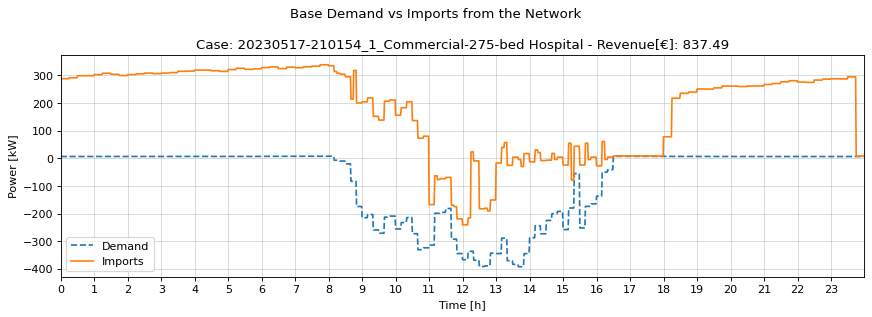

In [11]:
hours = simulation_time_series_resolution_in_hours * np.arange(number_of_time_intervals_per_day)
max_time = max(hours)
figure = plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours, data.active_power_demand_base_in_kilowatts[0], '--', label='Demand')
plt.plot(hours, data.market_active_power_in_kilowatts[0], label='Imports')
plt.suptitle('Base Demand vs Imports from the Network')
subtitle = 'Case: ' + str(data.FolderName[0]) + ' - ' + 'Revenue[€]: ' + str(data.revenue[0])
plt.title(subtitle)
plt.ylabel('Power [kW]')
plt.xlabel('Time [h]')
plt.xlim(0, max_time)
plt.xticks(np.arange(0, max_time, step=1))
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()

In [12]:
list_columns = []
for column in data.columns:
    if isinstance(data[column][0], list):
        list_columns.append(column)

In [13]:
list_columns

['market_active_power_in_kilowatts',
 'market_reactive_power_in_kilovolt_ampere_reactive',
 'active_power_demand_in_kilowatts',
 'active_power_demand_base_in_kilowatts',
 'imported_active_power_in_kilowatts',
 'exported_active_power_in_kilowatts',
 'building_power_consumption_in_kilowatts',
 'ambient_temperature_in_degree_celsius',
 'building_internal_temperature_in_celsius_degrees',
 'hvac_active_power_in_kilowatts',
 'storage_asset_accumulated_power_in_kilowatts']

In [14]:
number_of_rows = data.shape[0]
number_of_rows

9

In [15]:
data.iloc[0]

FolderName                                                        20230517-210154_1_Commercial-275-bed Hospital
rated_photovoltaic_kilowatts                                                                                400
simulation_time_series_resolution_in_minutes                                                                  1
energy_management_system_time_series_resolution_in_minutes                                                   15
max_storage_asset_energy_in_kilowatt_hour                                                                   500
                                                                                    ...                        
building_power_consumption_in_kilowatts                       [[244.16591560715298], [246.72670913556766], [...
ambient_temperature_in_degree_celsius                         [-3.6851740626763085, -3.9440702927850753, -4....
building_internal_temperature_in_celsius_degrees              [20.999999999999655, 21.000000000075094, 2

In [16]:
# for number_of_row in np.arange(0, number_of_rows):
#     row_data = data.iloc[number_of_row]
#     for list_column in list_columns:
#         figure = plt.figure(num=None, figsize=(15, 2), dpi=80, facecolor='w', edgecolor='k')
#         plt.plot(data[list_column][0])
#         case_name = row_data['FolderName']
#         plt.title(f'{case_name} - {list_column}');

In [17]:
data.shape

(9, 66)

In [18]:
number_of_columns = data.shape[1]
number_of_plots = number_of_rows * number_of_columns

In [19]:
# fig = plt.figure()
# for number_of_plot in np.arange(0, number_of_plots):
#     for number_of_row in np.arange(0, number_of_rows):
#         row_data = data.iloc[number_of_row]
#         for list_column in list_columns:
#             ax = fig.add_subplot(number_of_rows, number_of_columns, number_of_plot + 1)
#             ax.plot(row_data[list_column])

C:\Users\IkerDeLoma-Osorio\AppData\Local\Temp\ipykernel_38328\3546177727.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(num=None, figsize=(15, 2), dpi=80, facecolor='w', edgecolor='k')


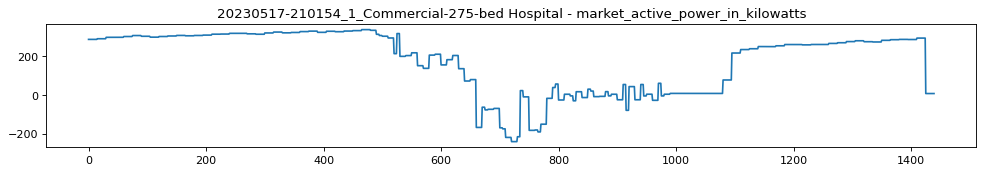

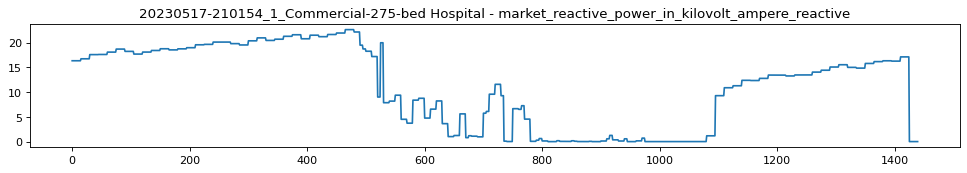

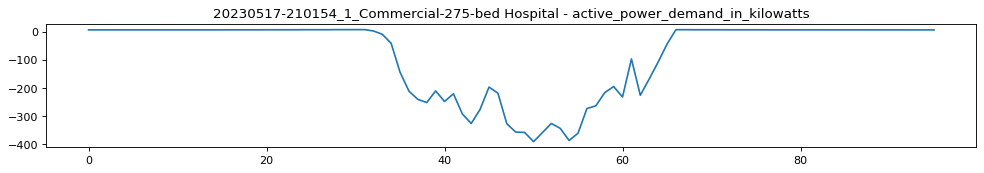

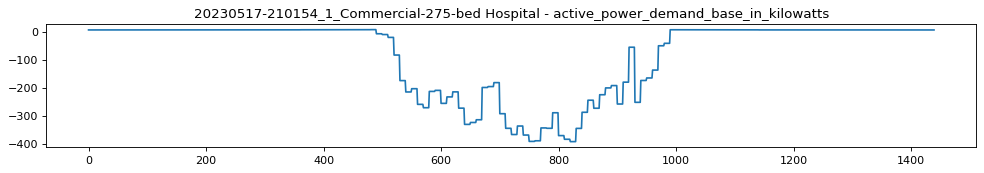

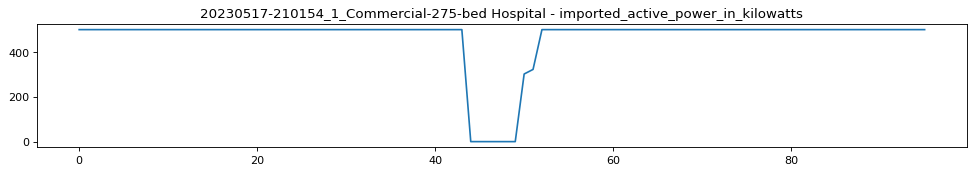

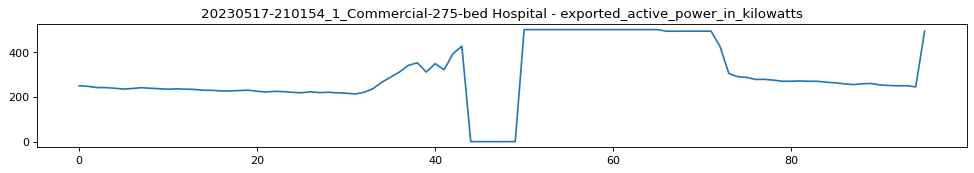

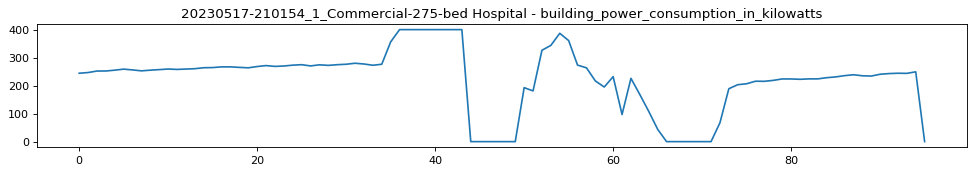

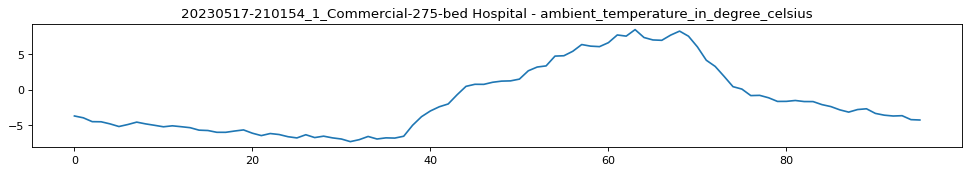

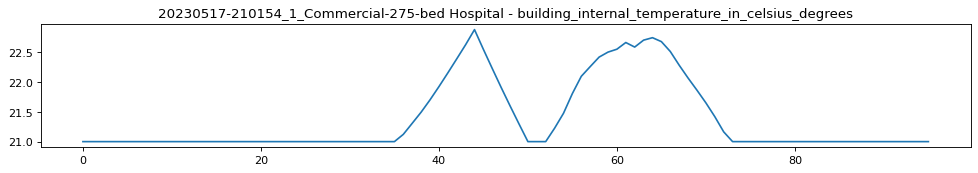

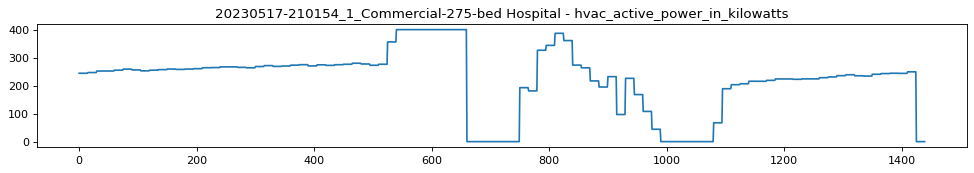

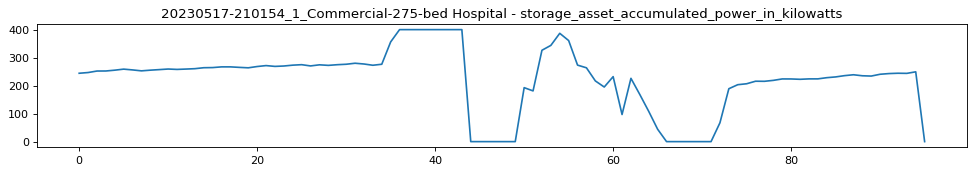

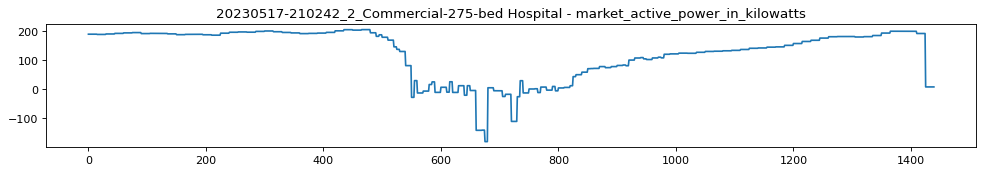

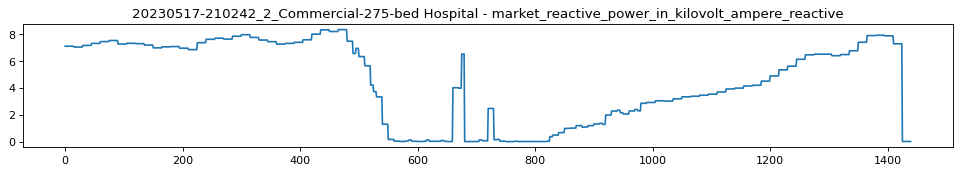

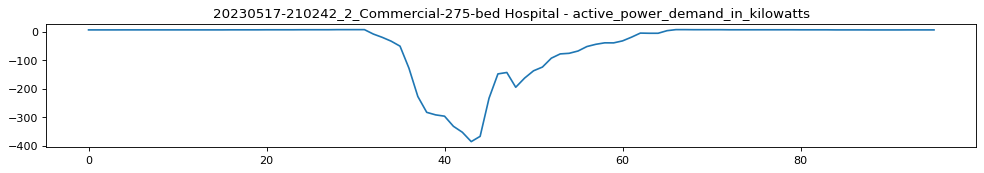

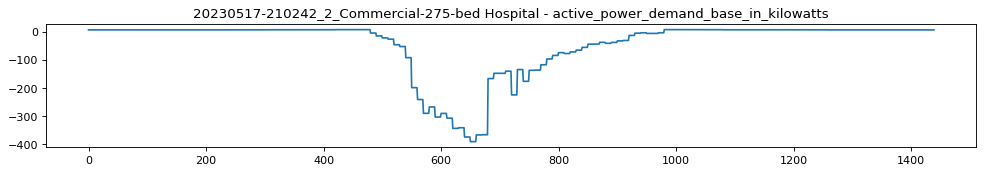

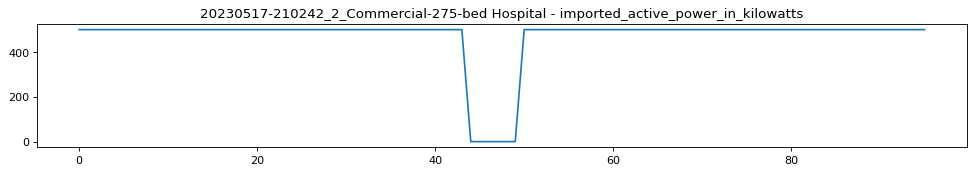

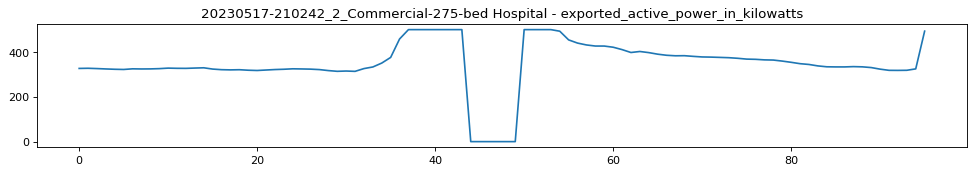

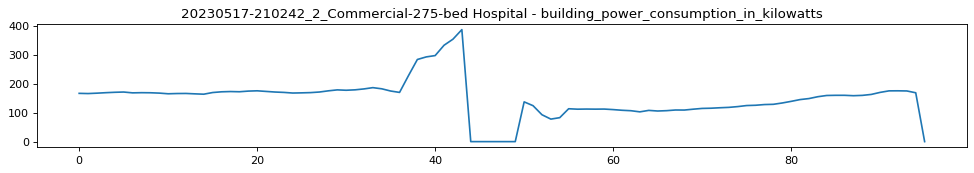

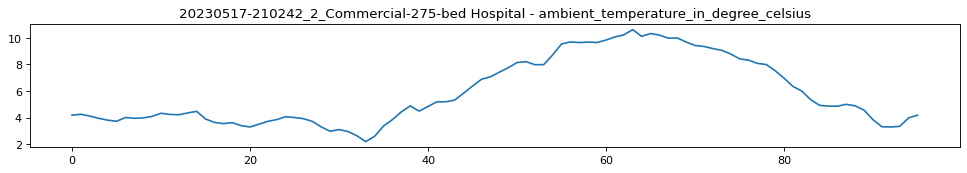

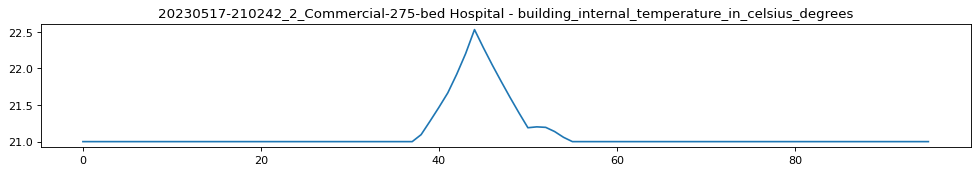

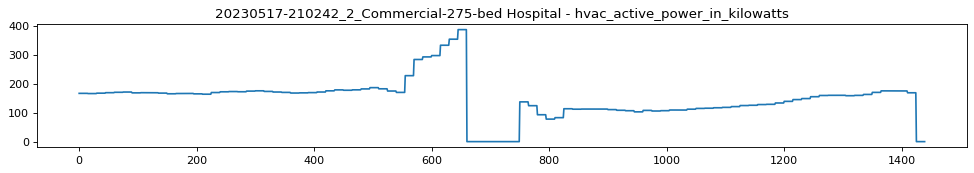

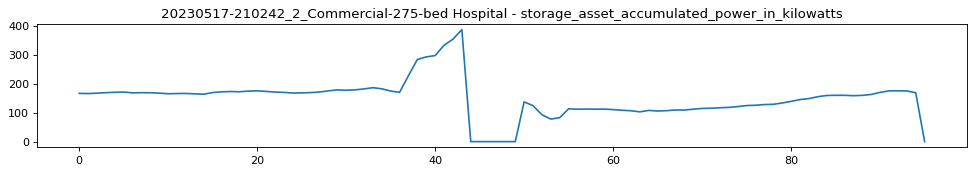

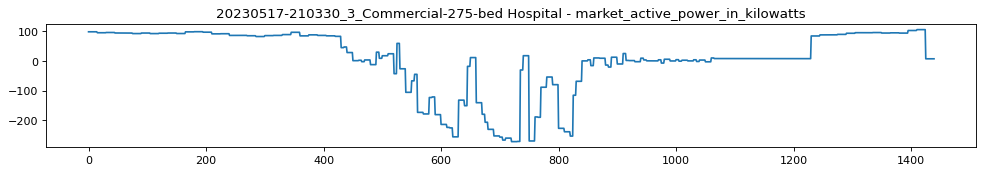

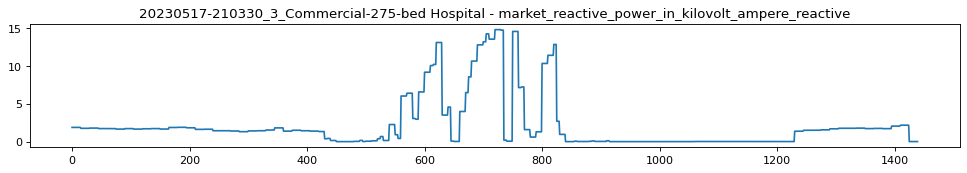

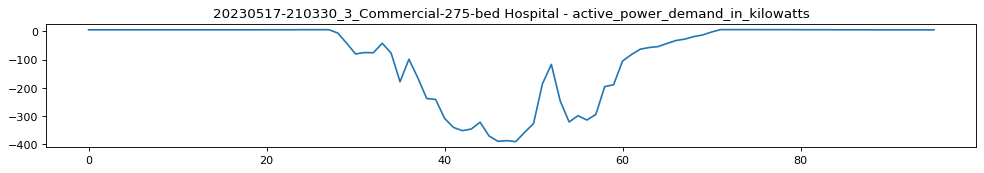

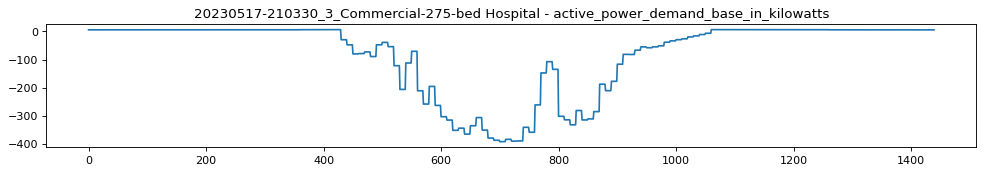

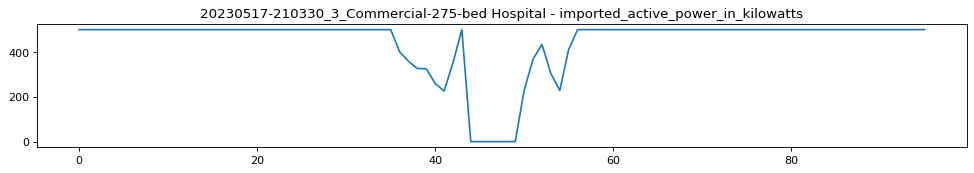

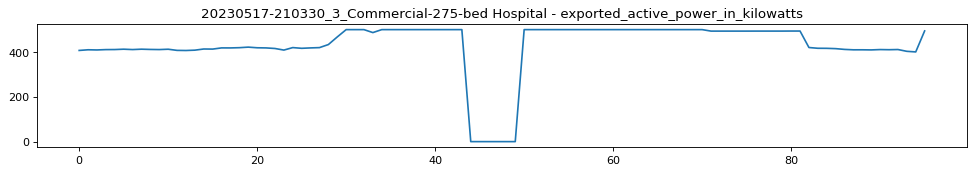

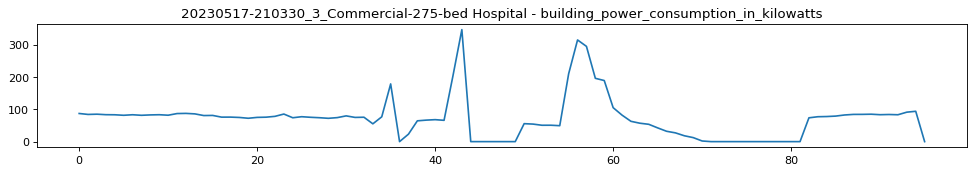

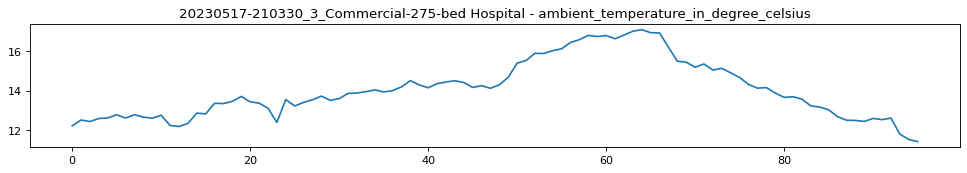

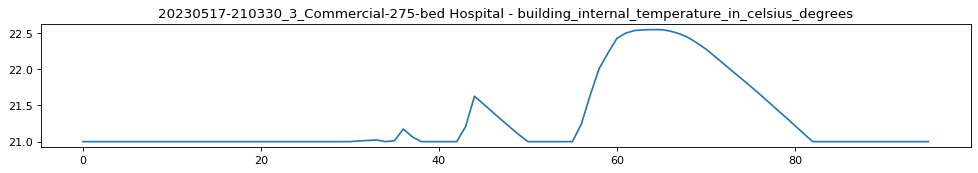

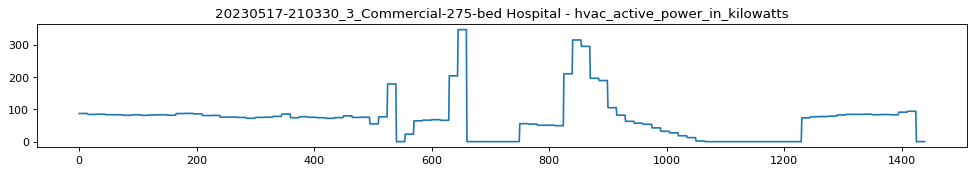

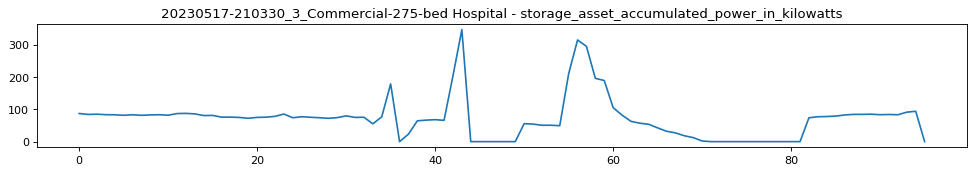

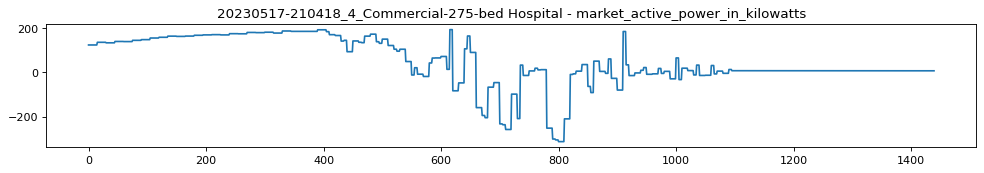

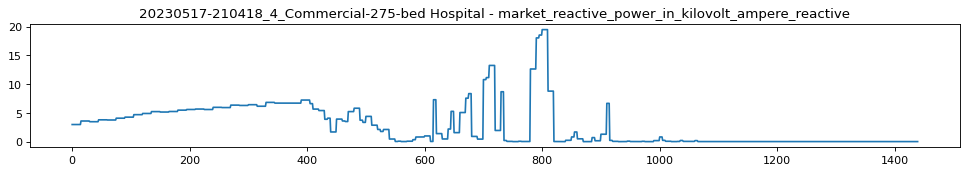

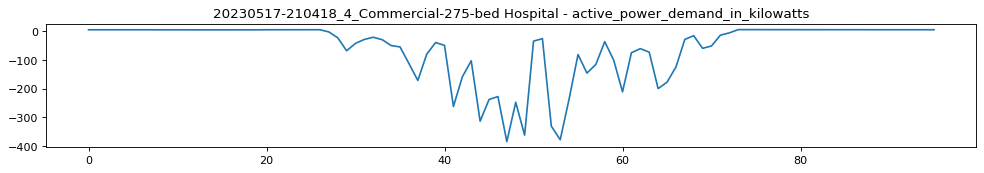

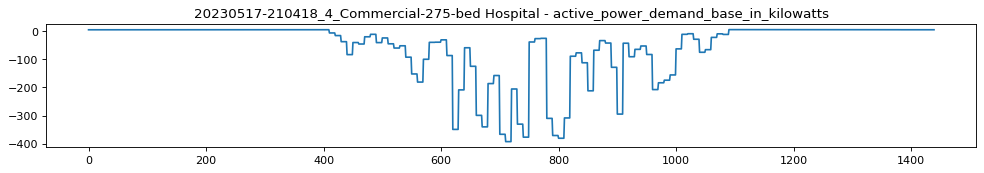

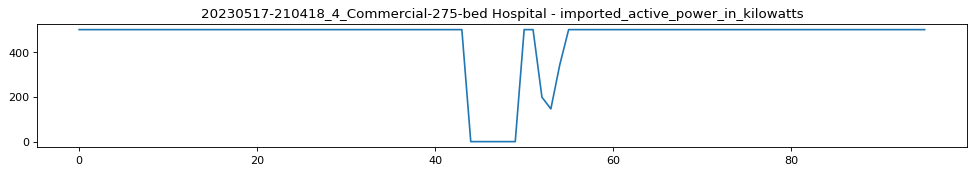

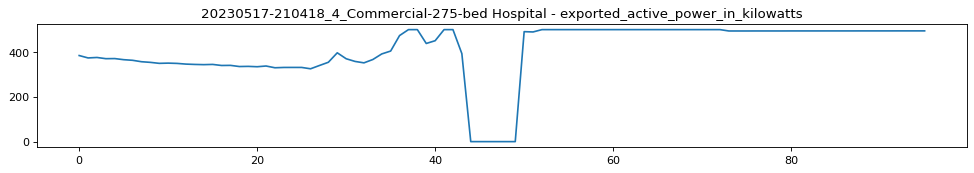

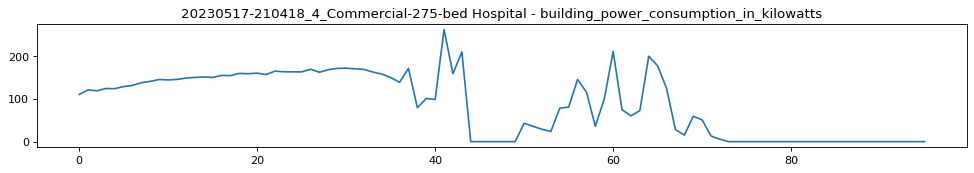

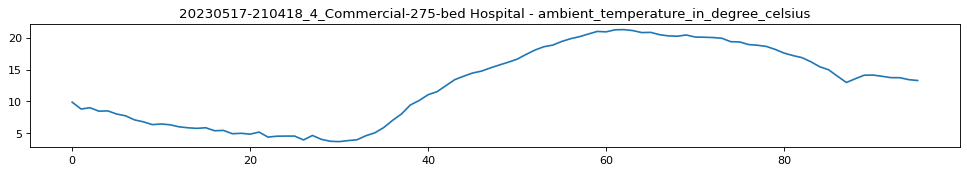

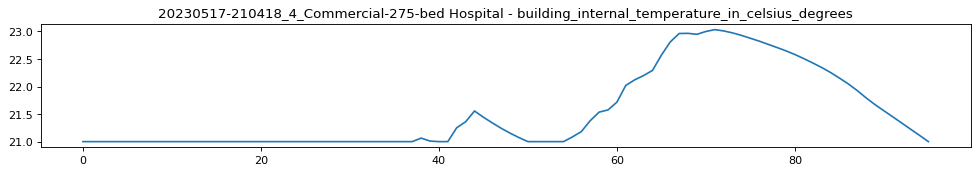

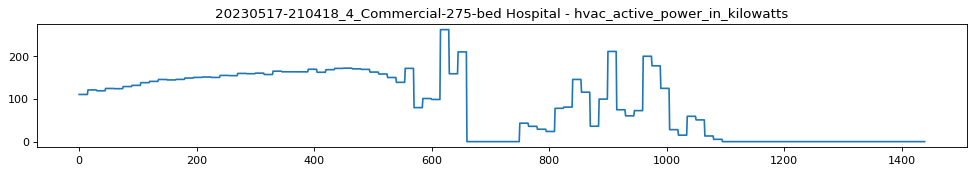

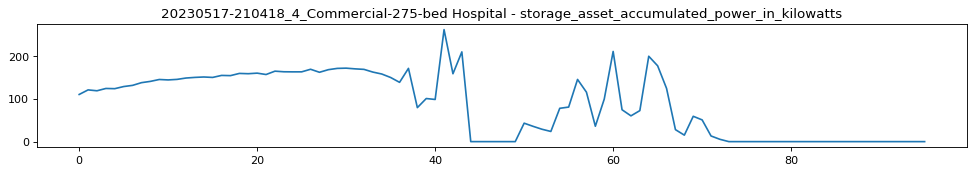

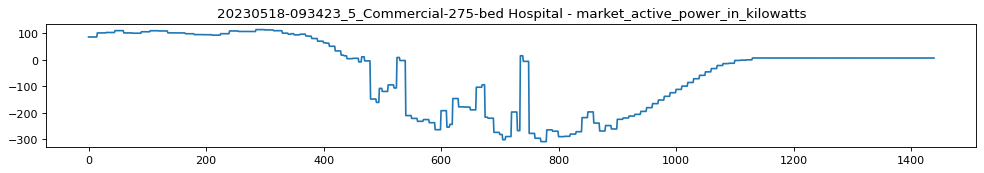

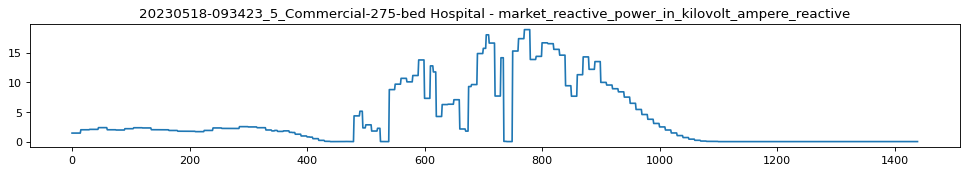

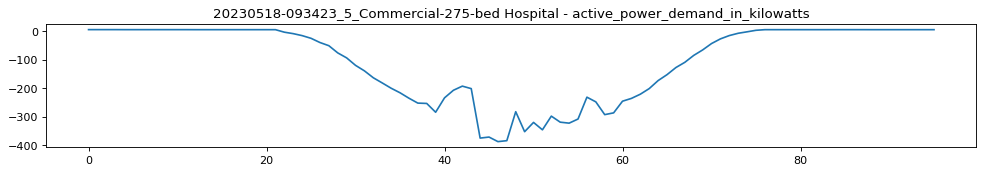

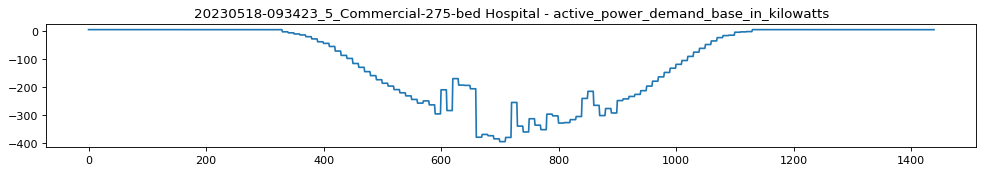

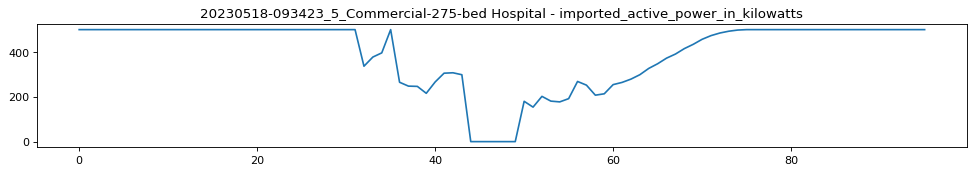

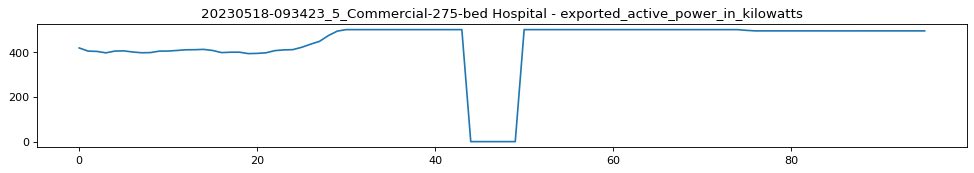

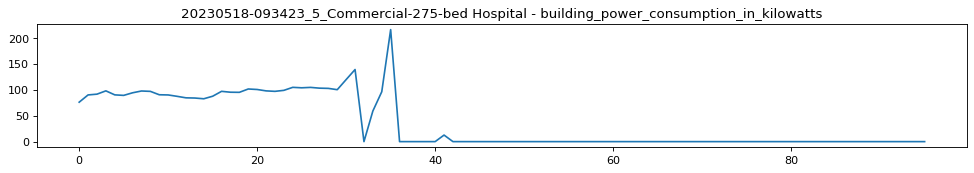

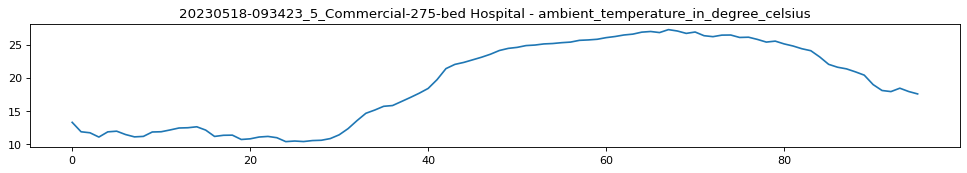

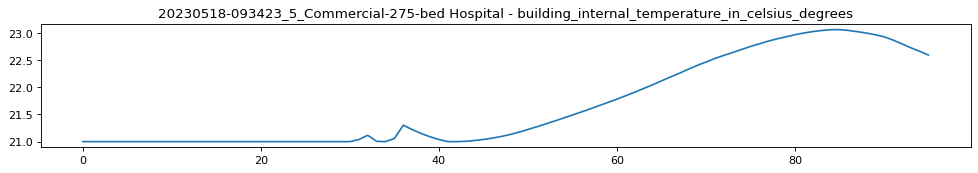

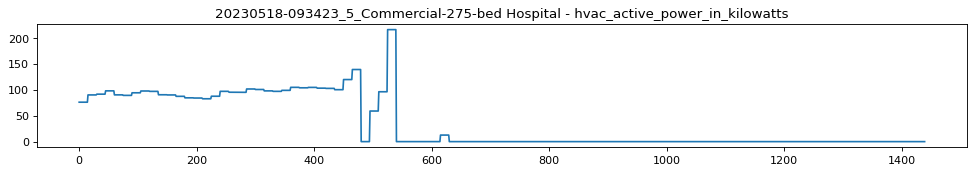

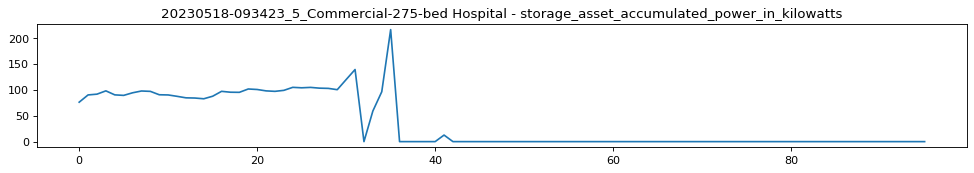

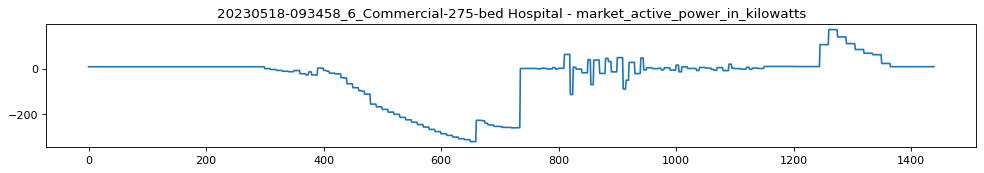

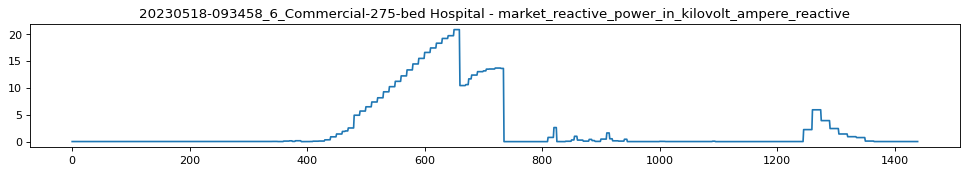

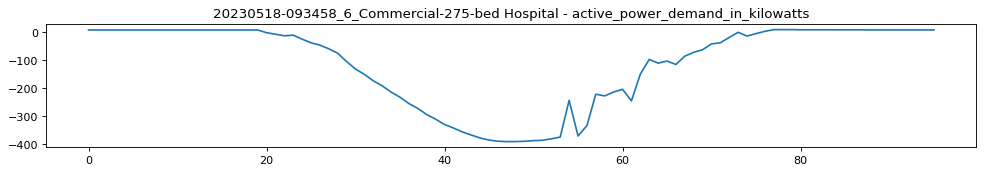

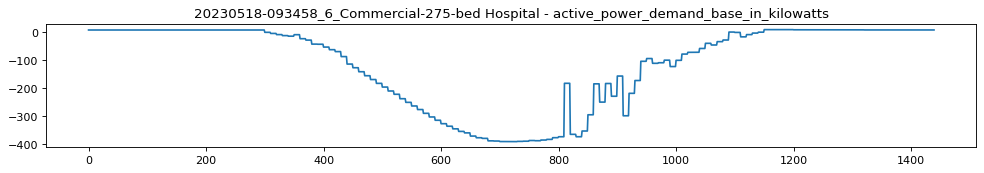

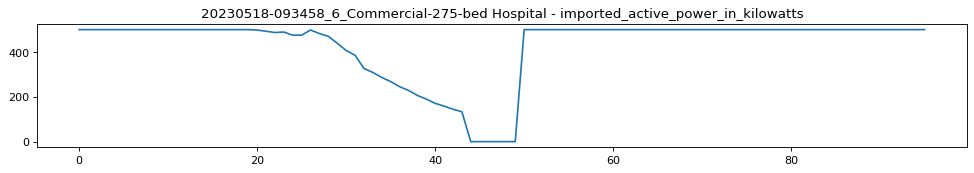

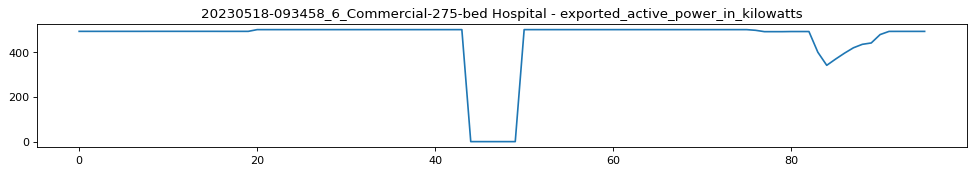

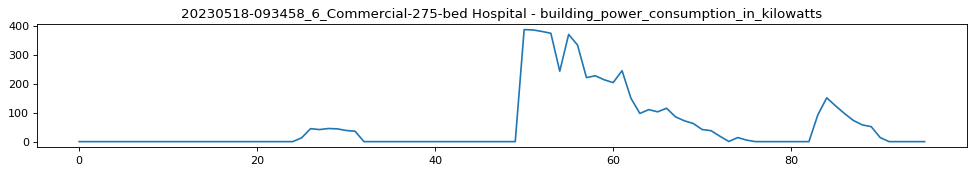

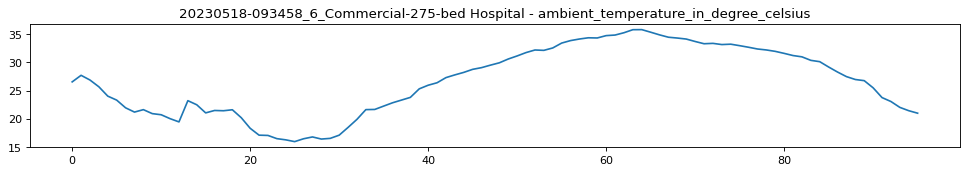

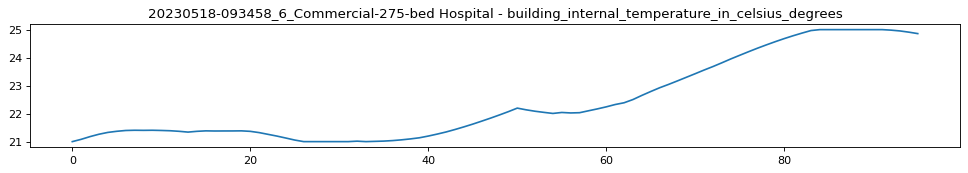

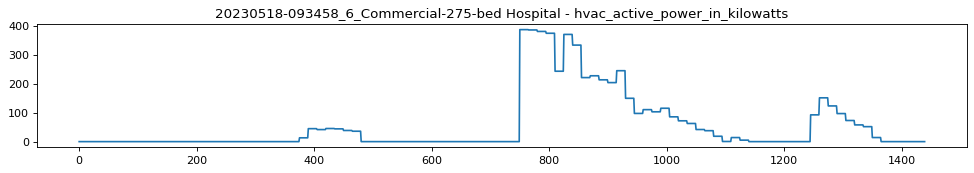

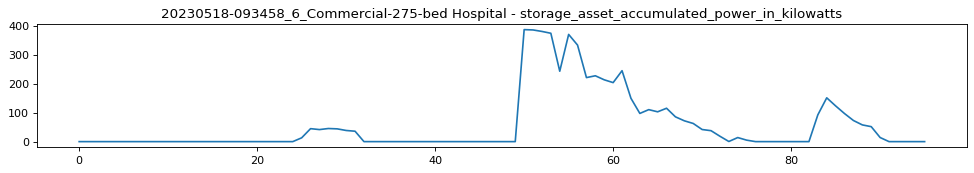

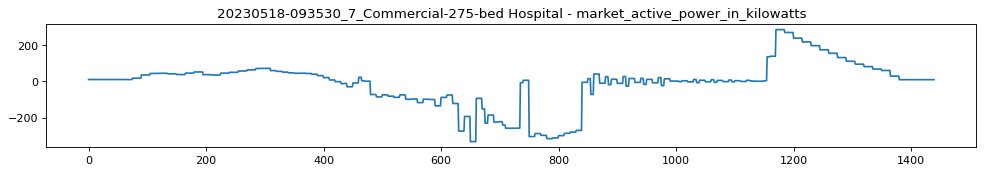

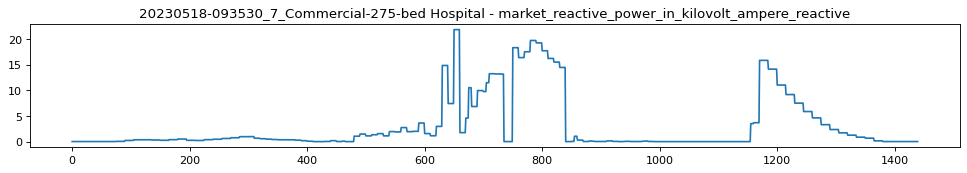

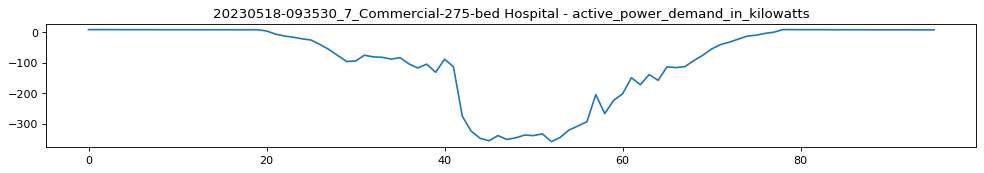

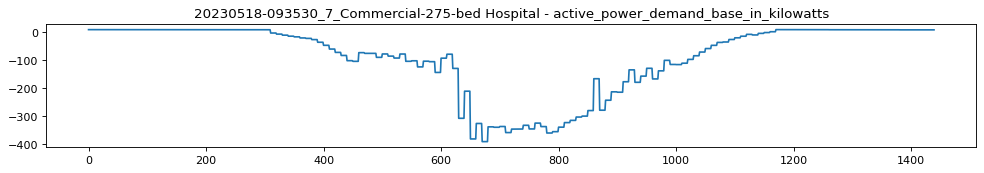

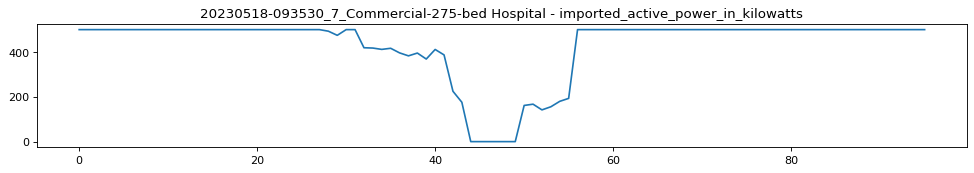

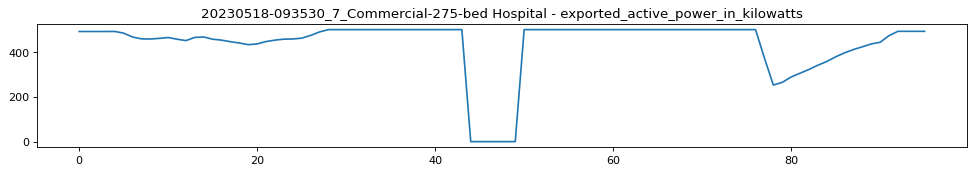

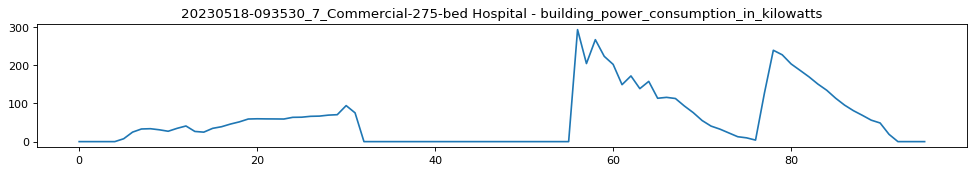

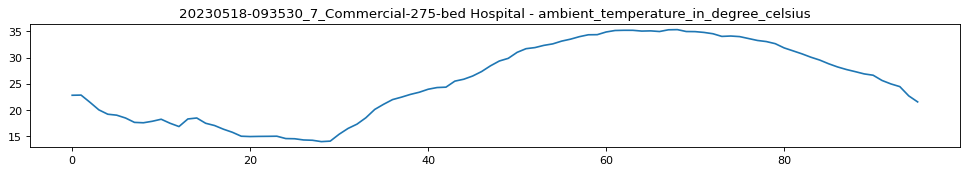

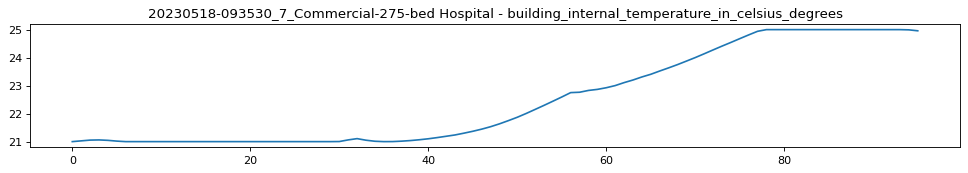

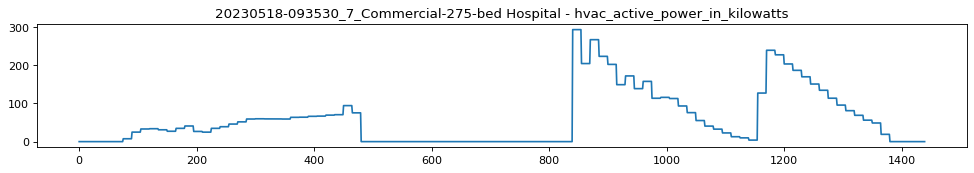

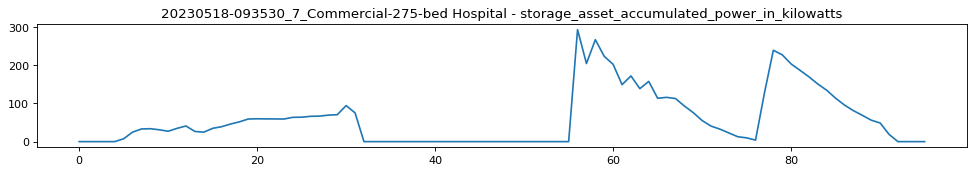

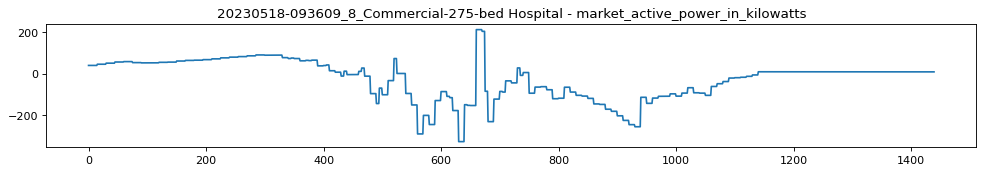

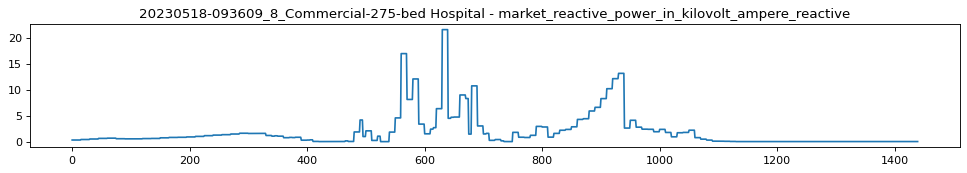

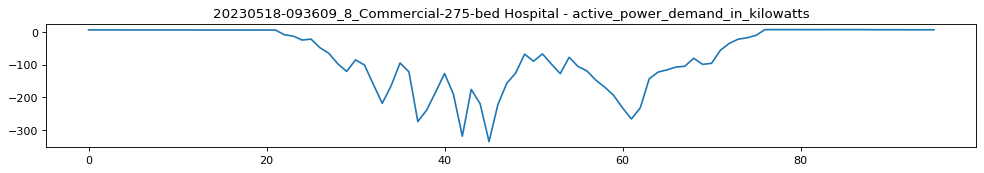

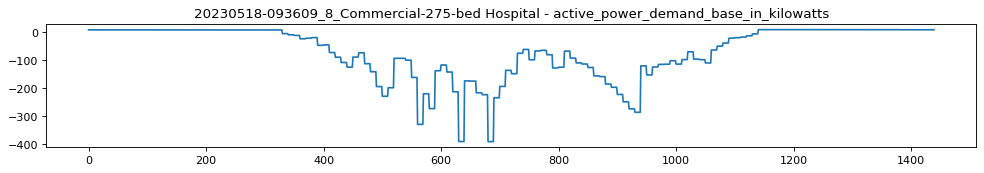

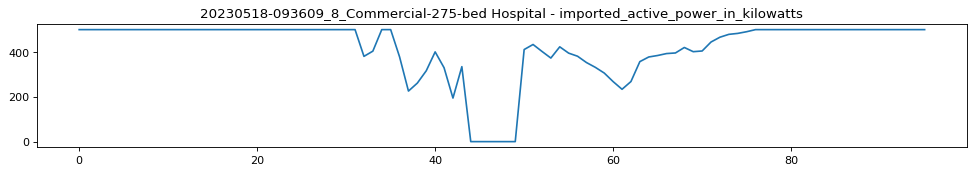

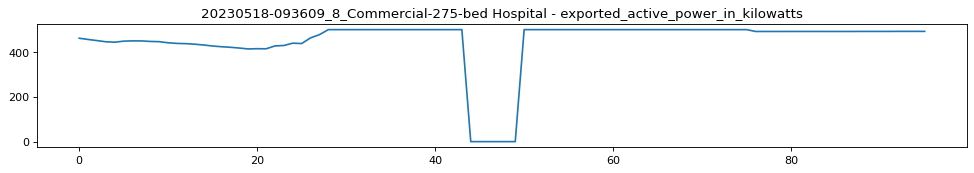

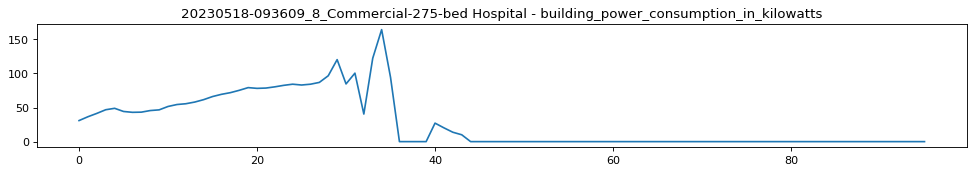

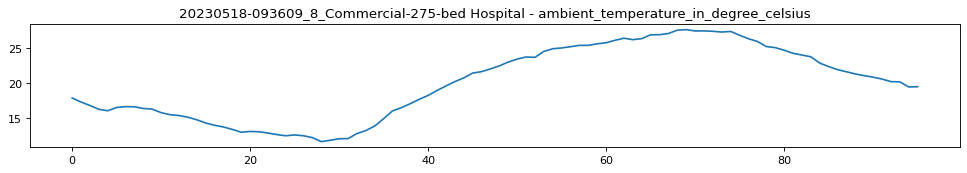

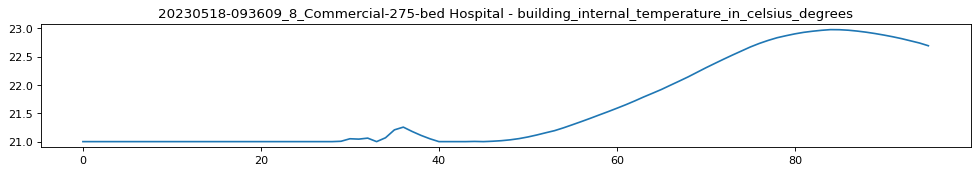

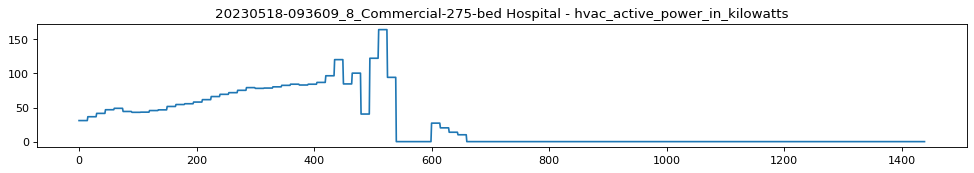

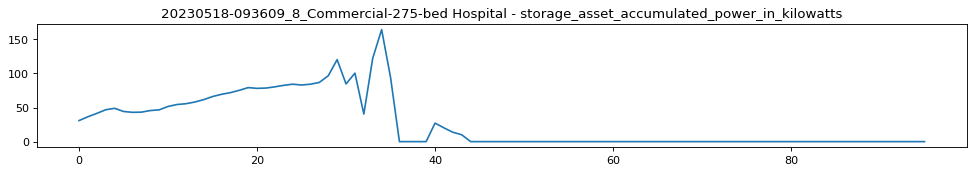

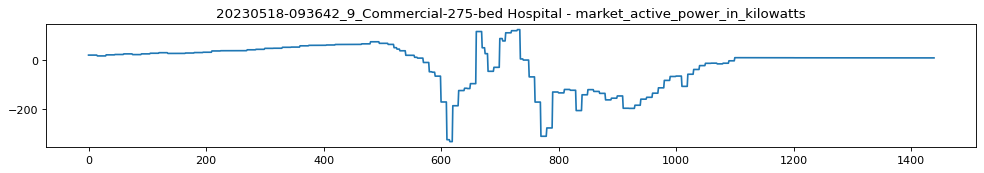

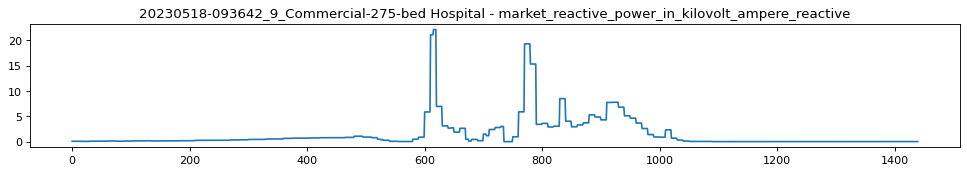

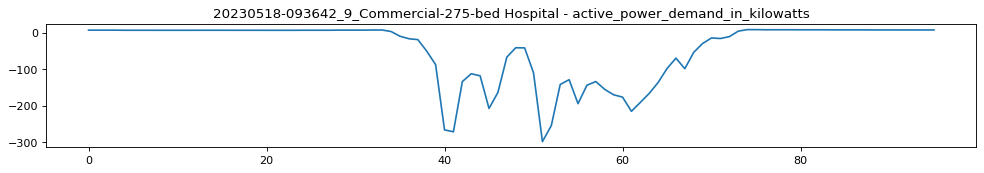

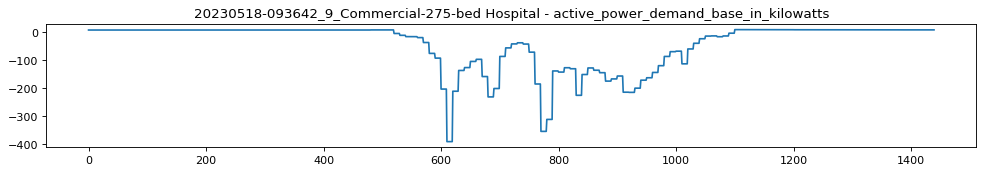

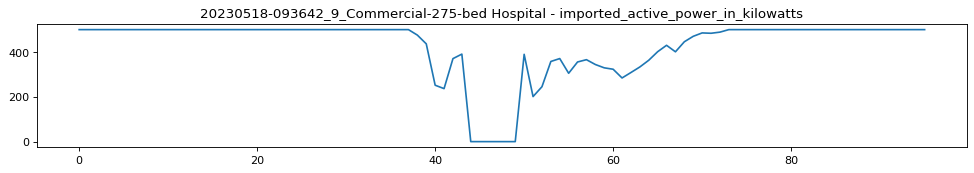

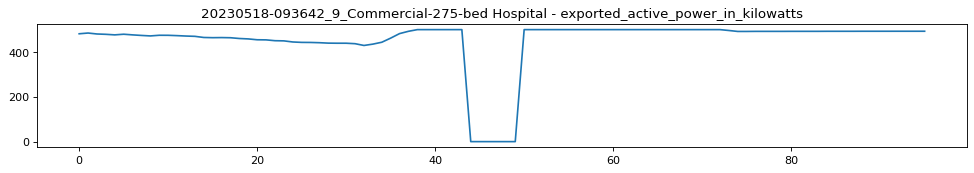

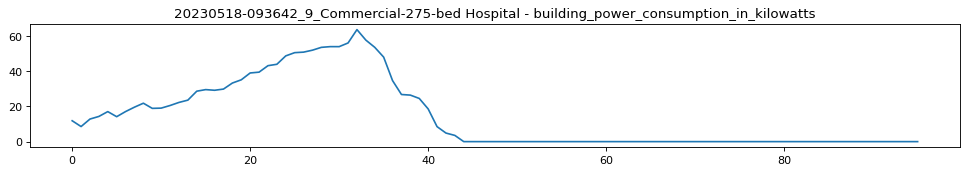

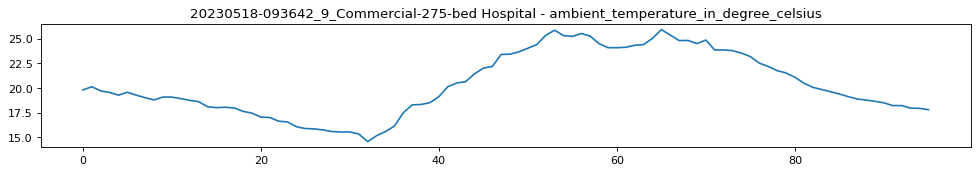

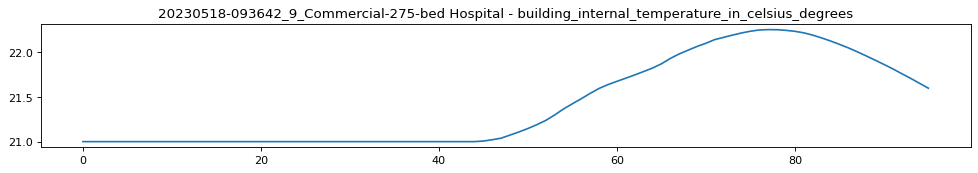

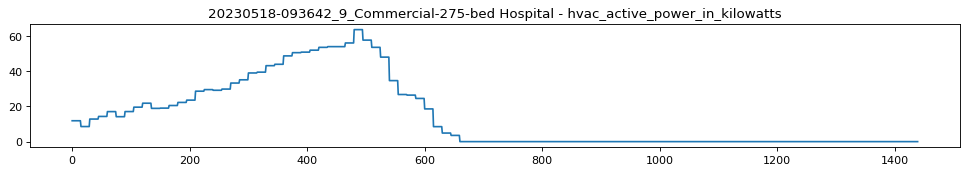

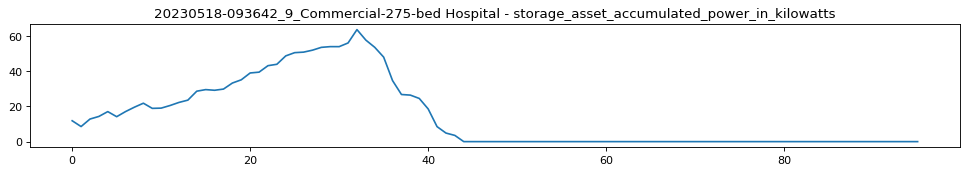

In [20]:
# for number_of_row in np.arange(0, number_of_rows):
#     row_data = data.iloc[number_of_row]
#     for list_column in list_columns:
#         figure = plt.figure(num=None, figsize=(15, 2), dpi=80, facecolor='w', edgecolor='k')
#         plt.plot(row_data[list_column])
#         case_name = row_data['FolderName']
#         plt.title(f'{case_name} - {list_column}');

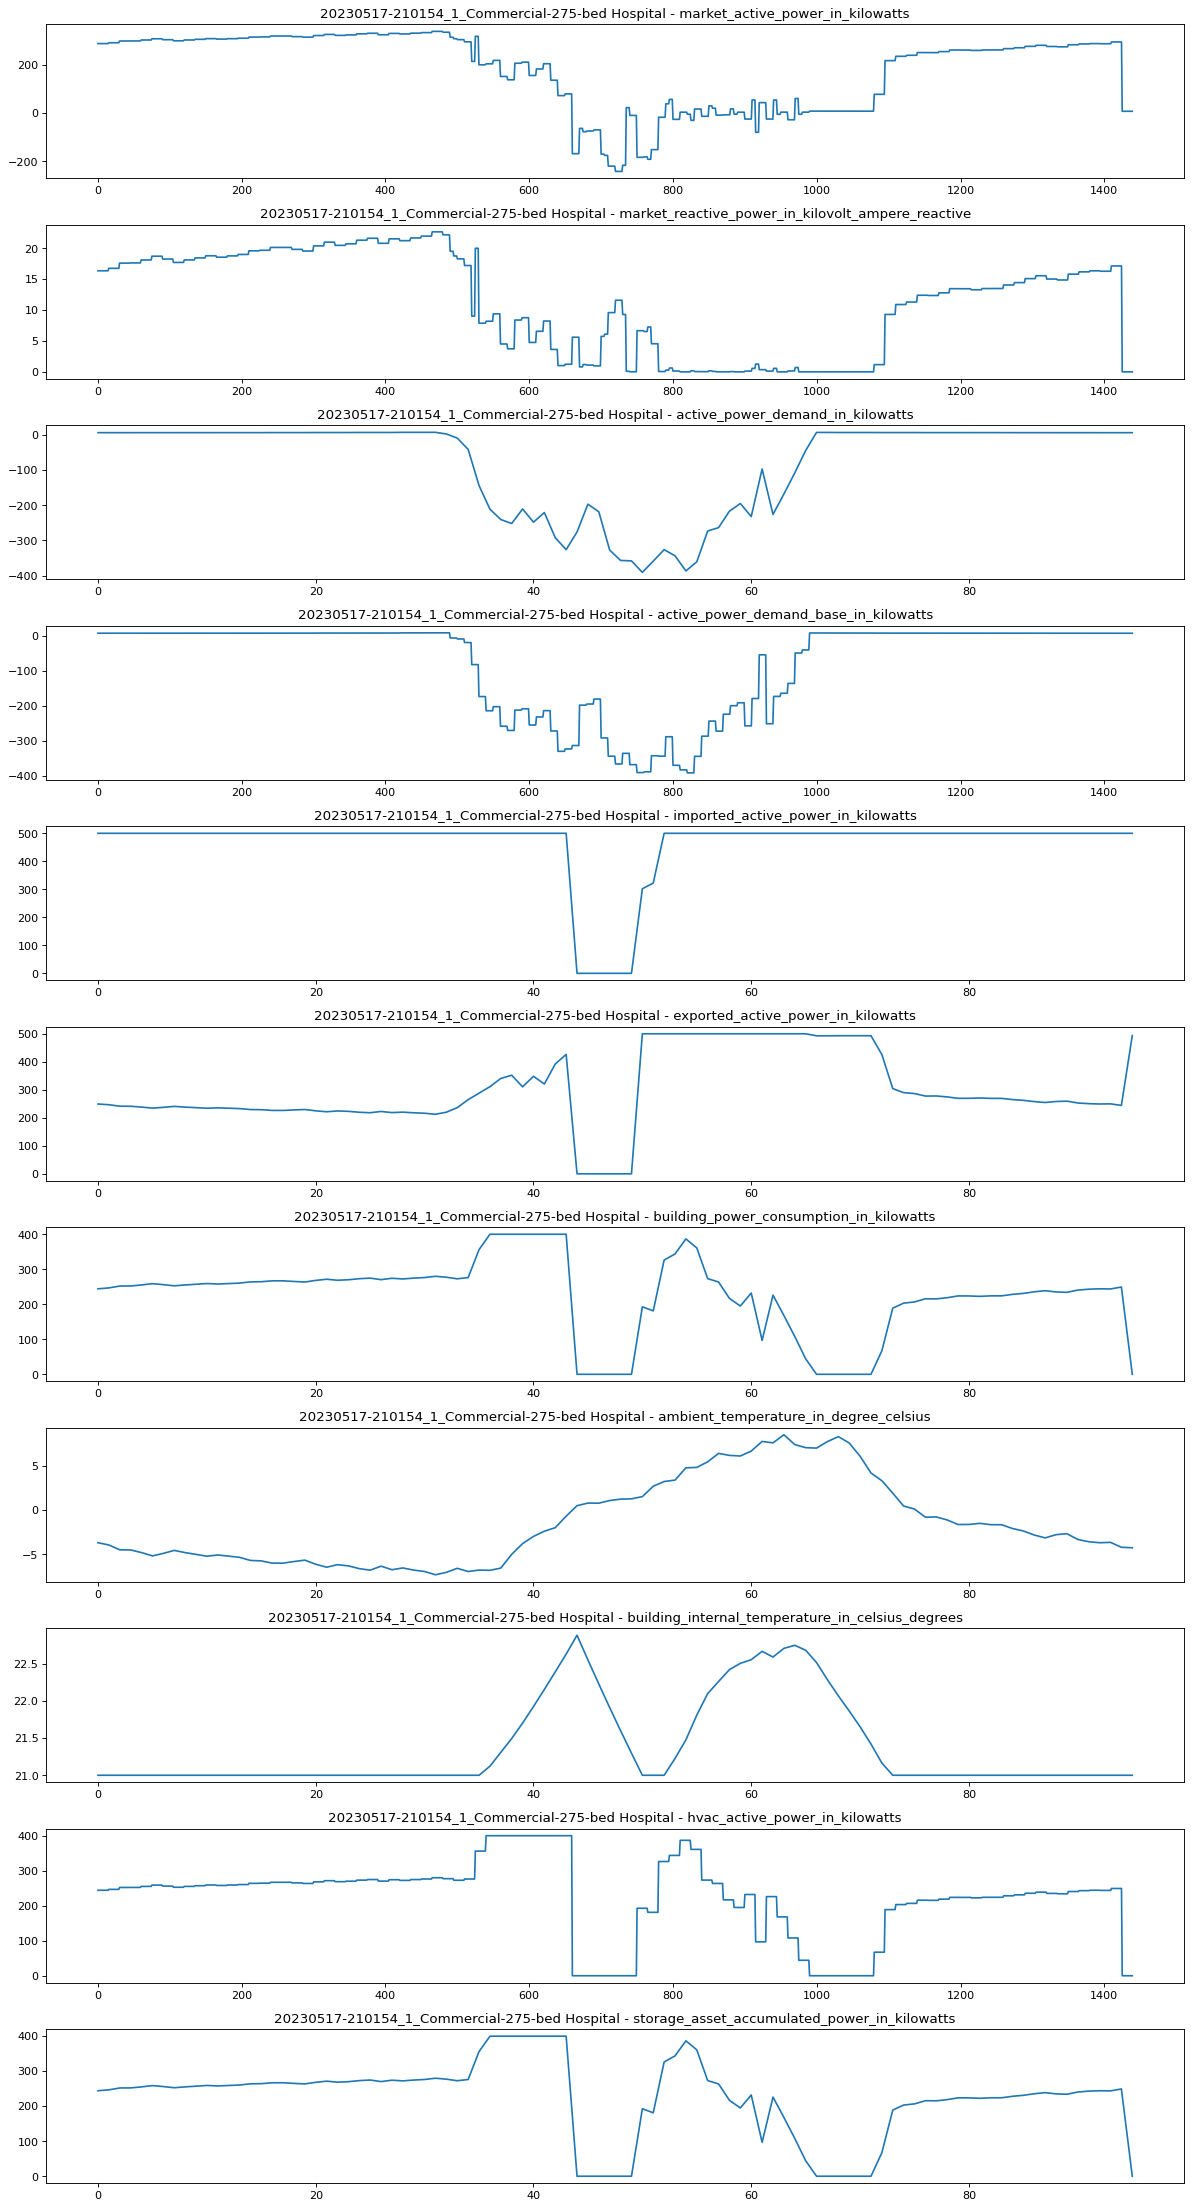

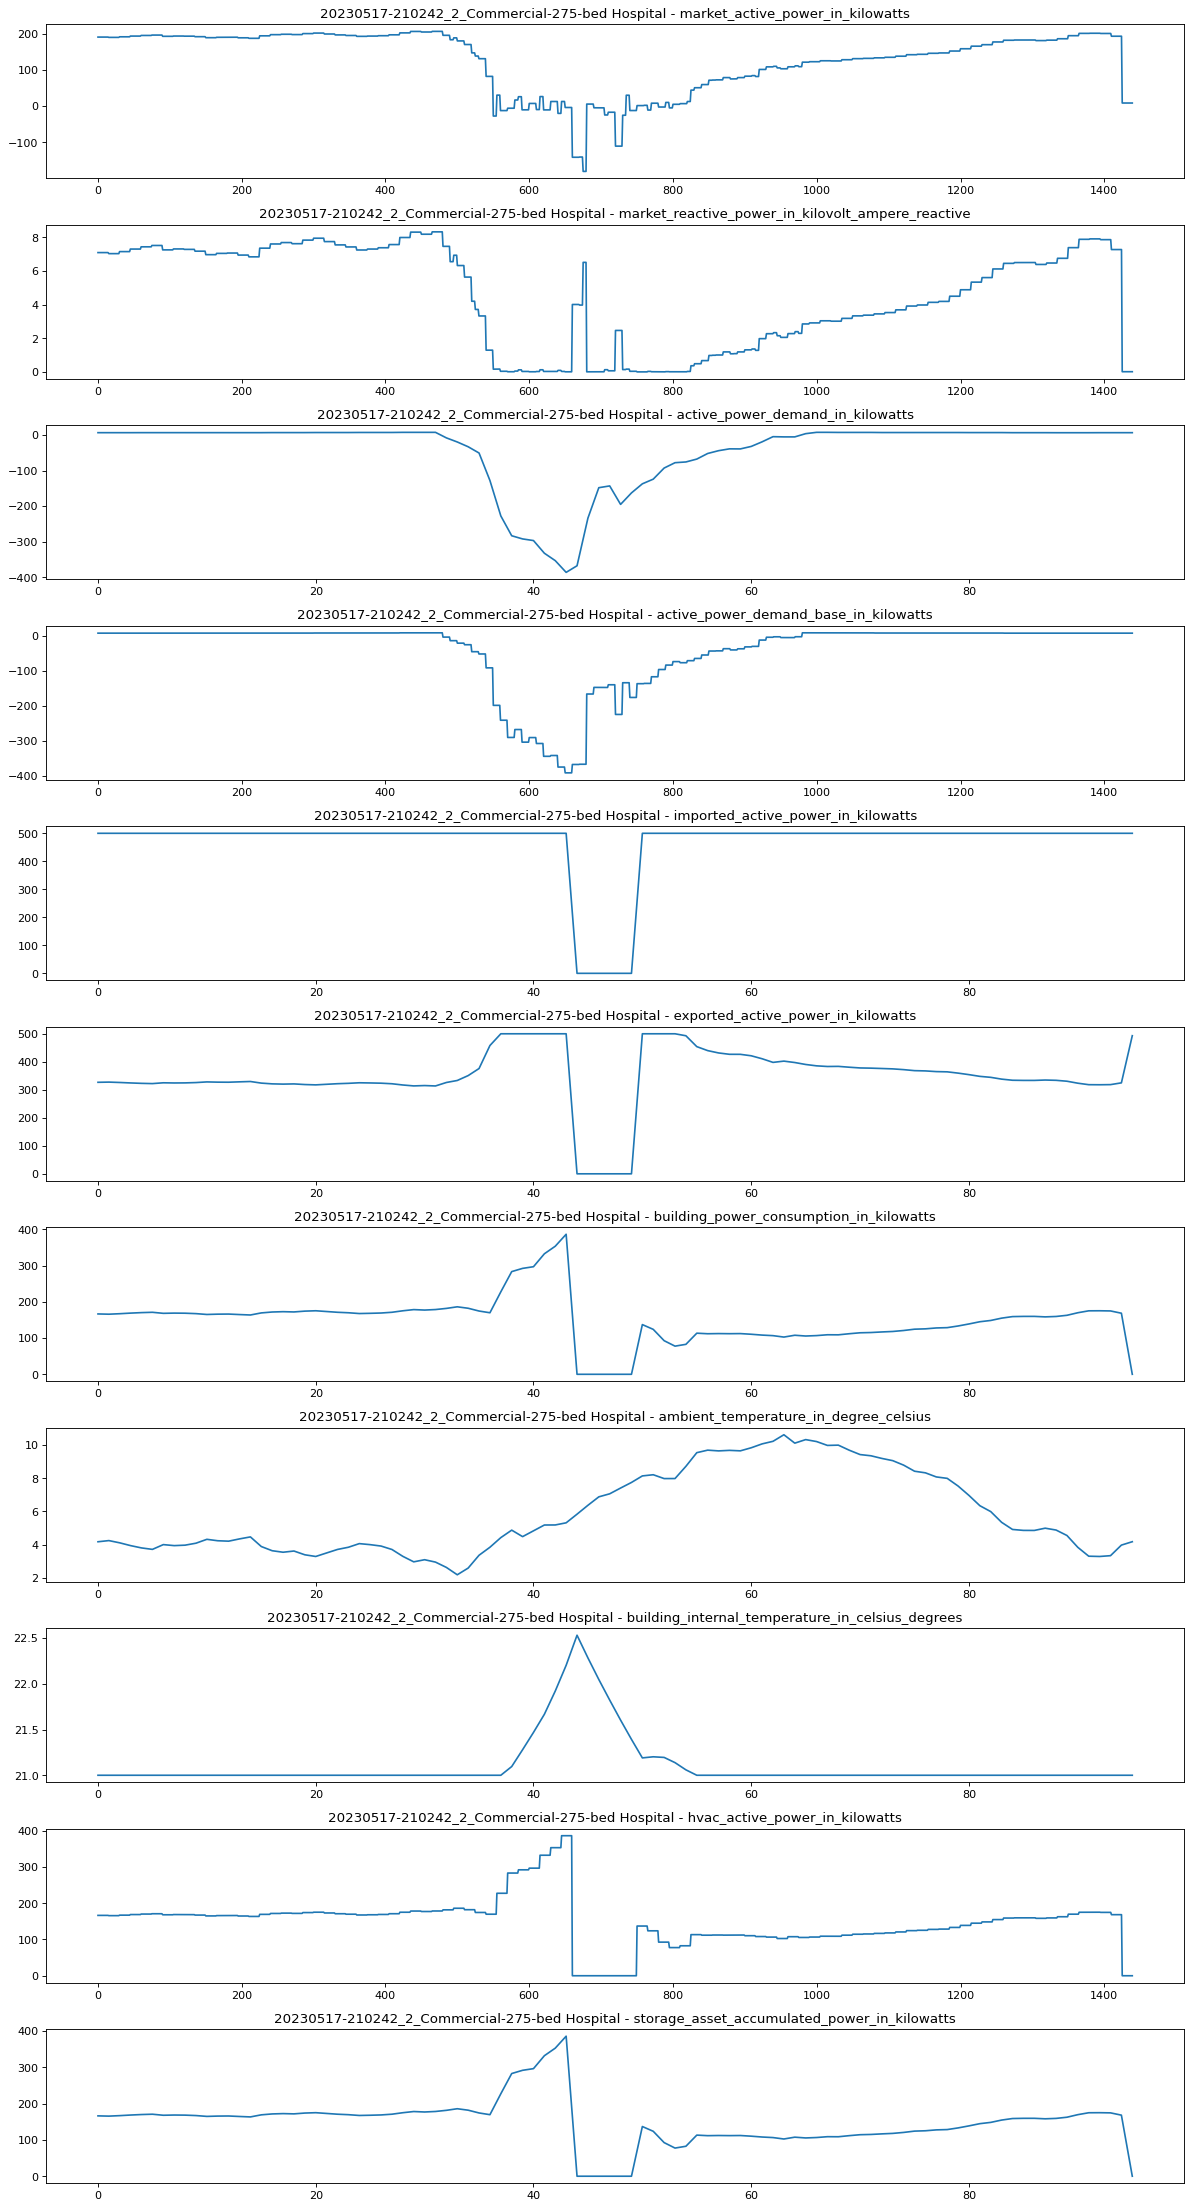

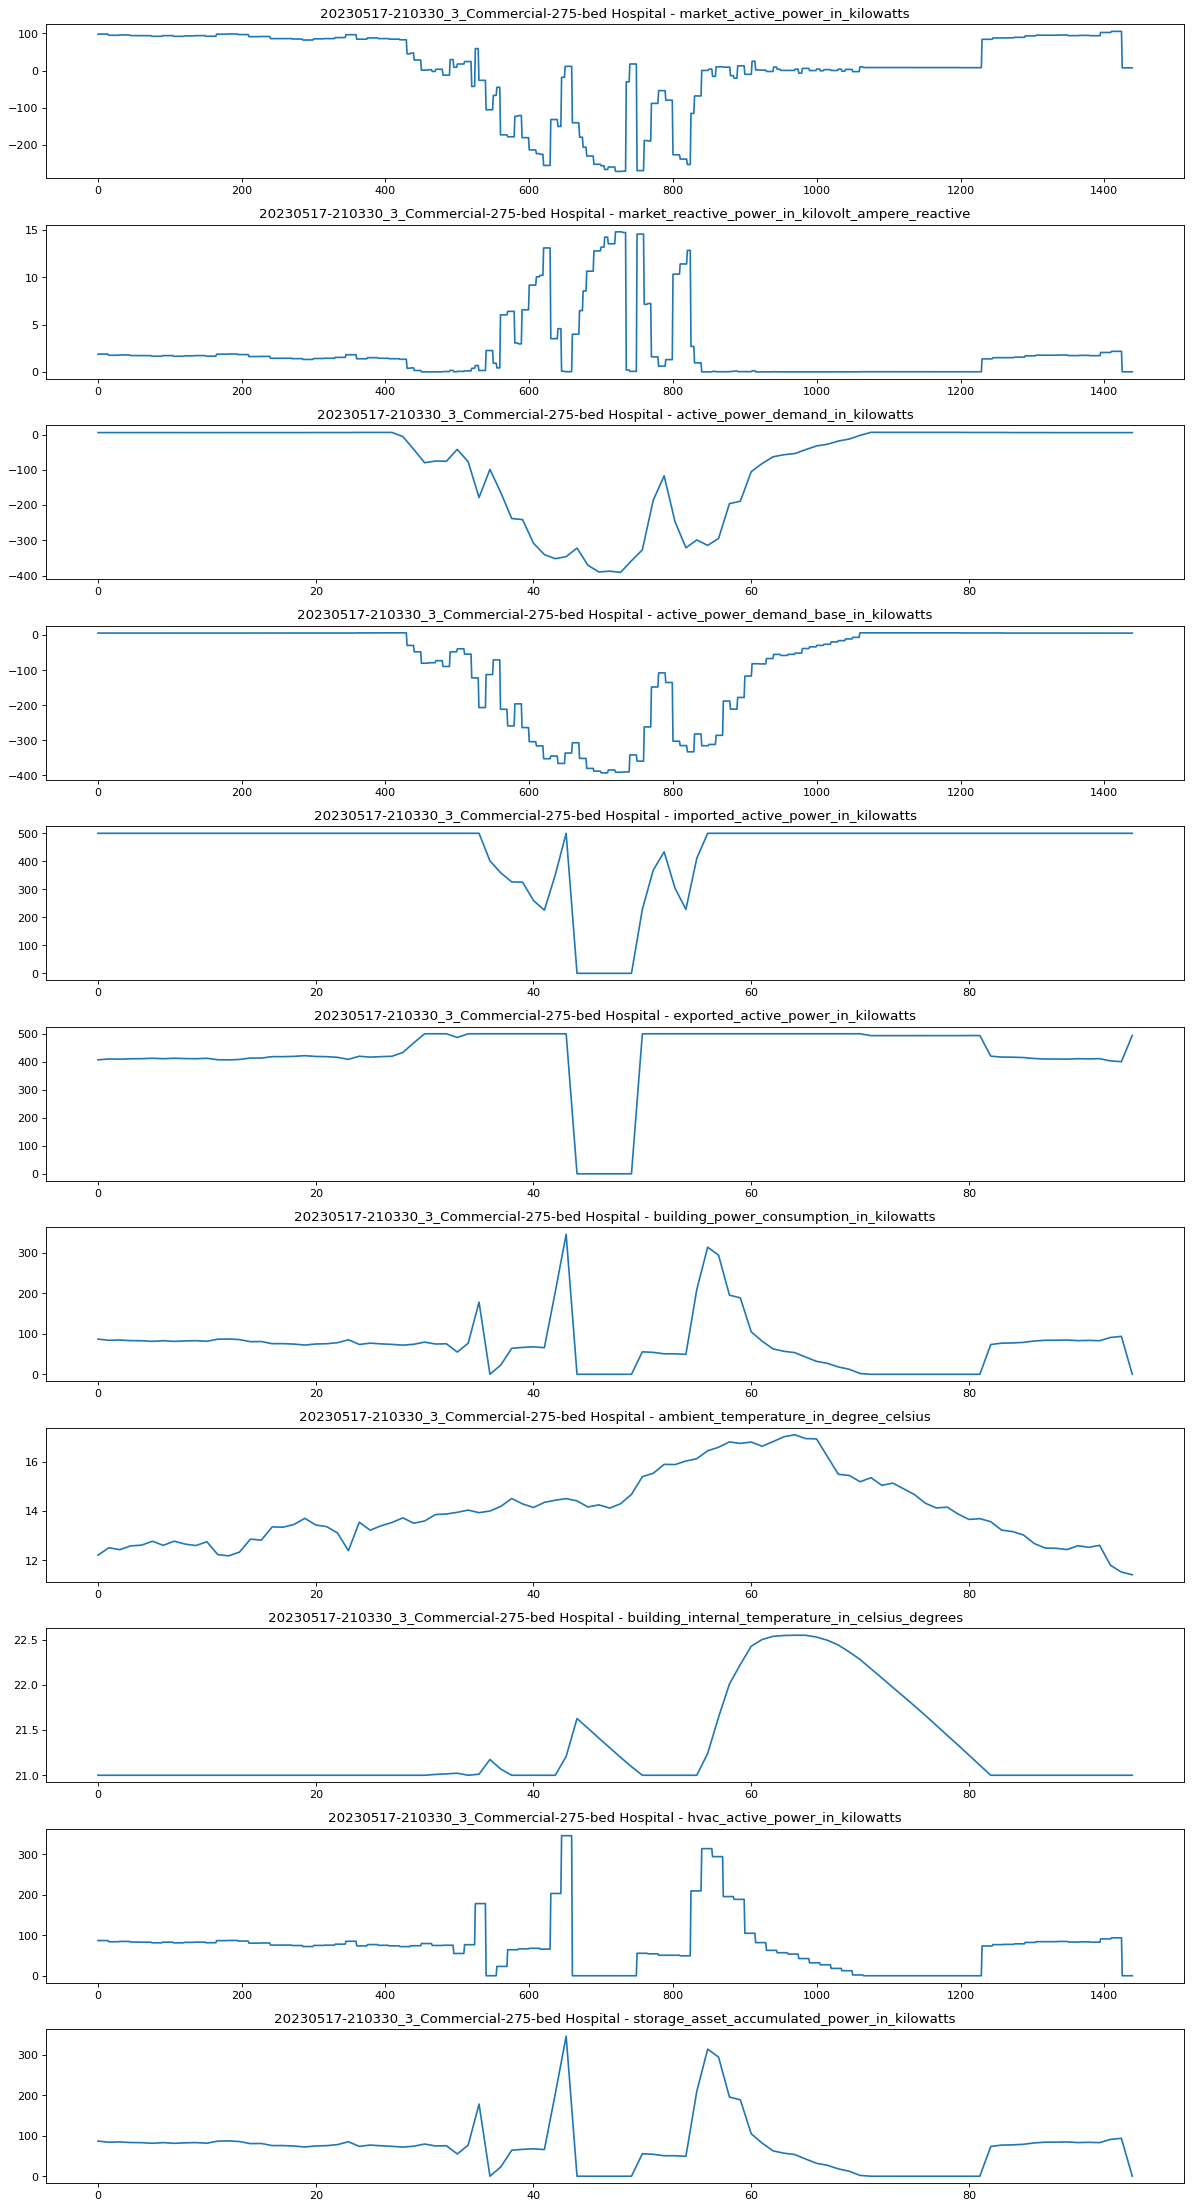

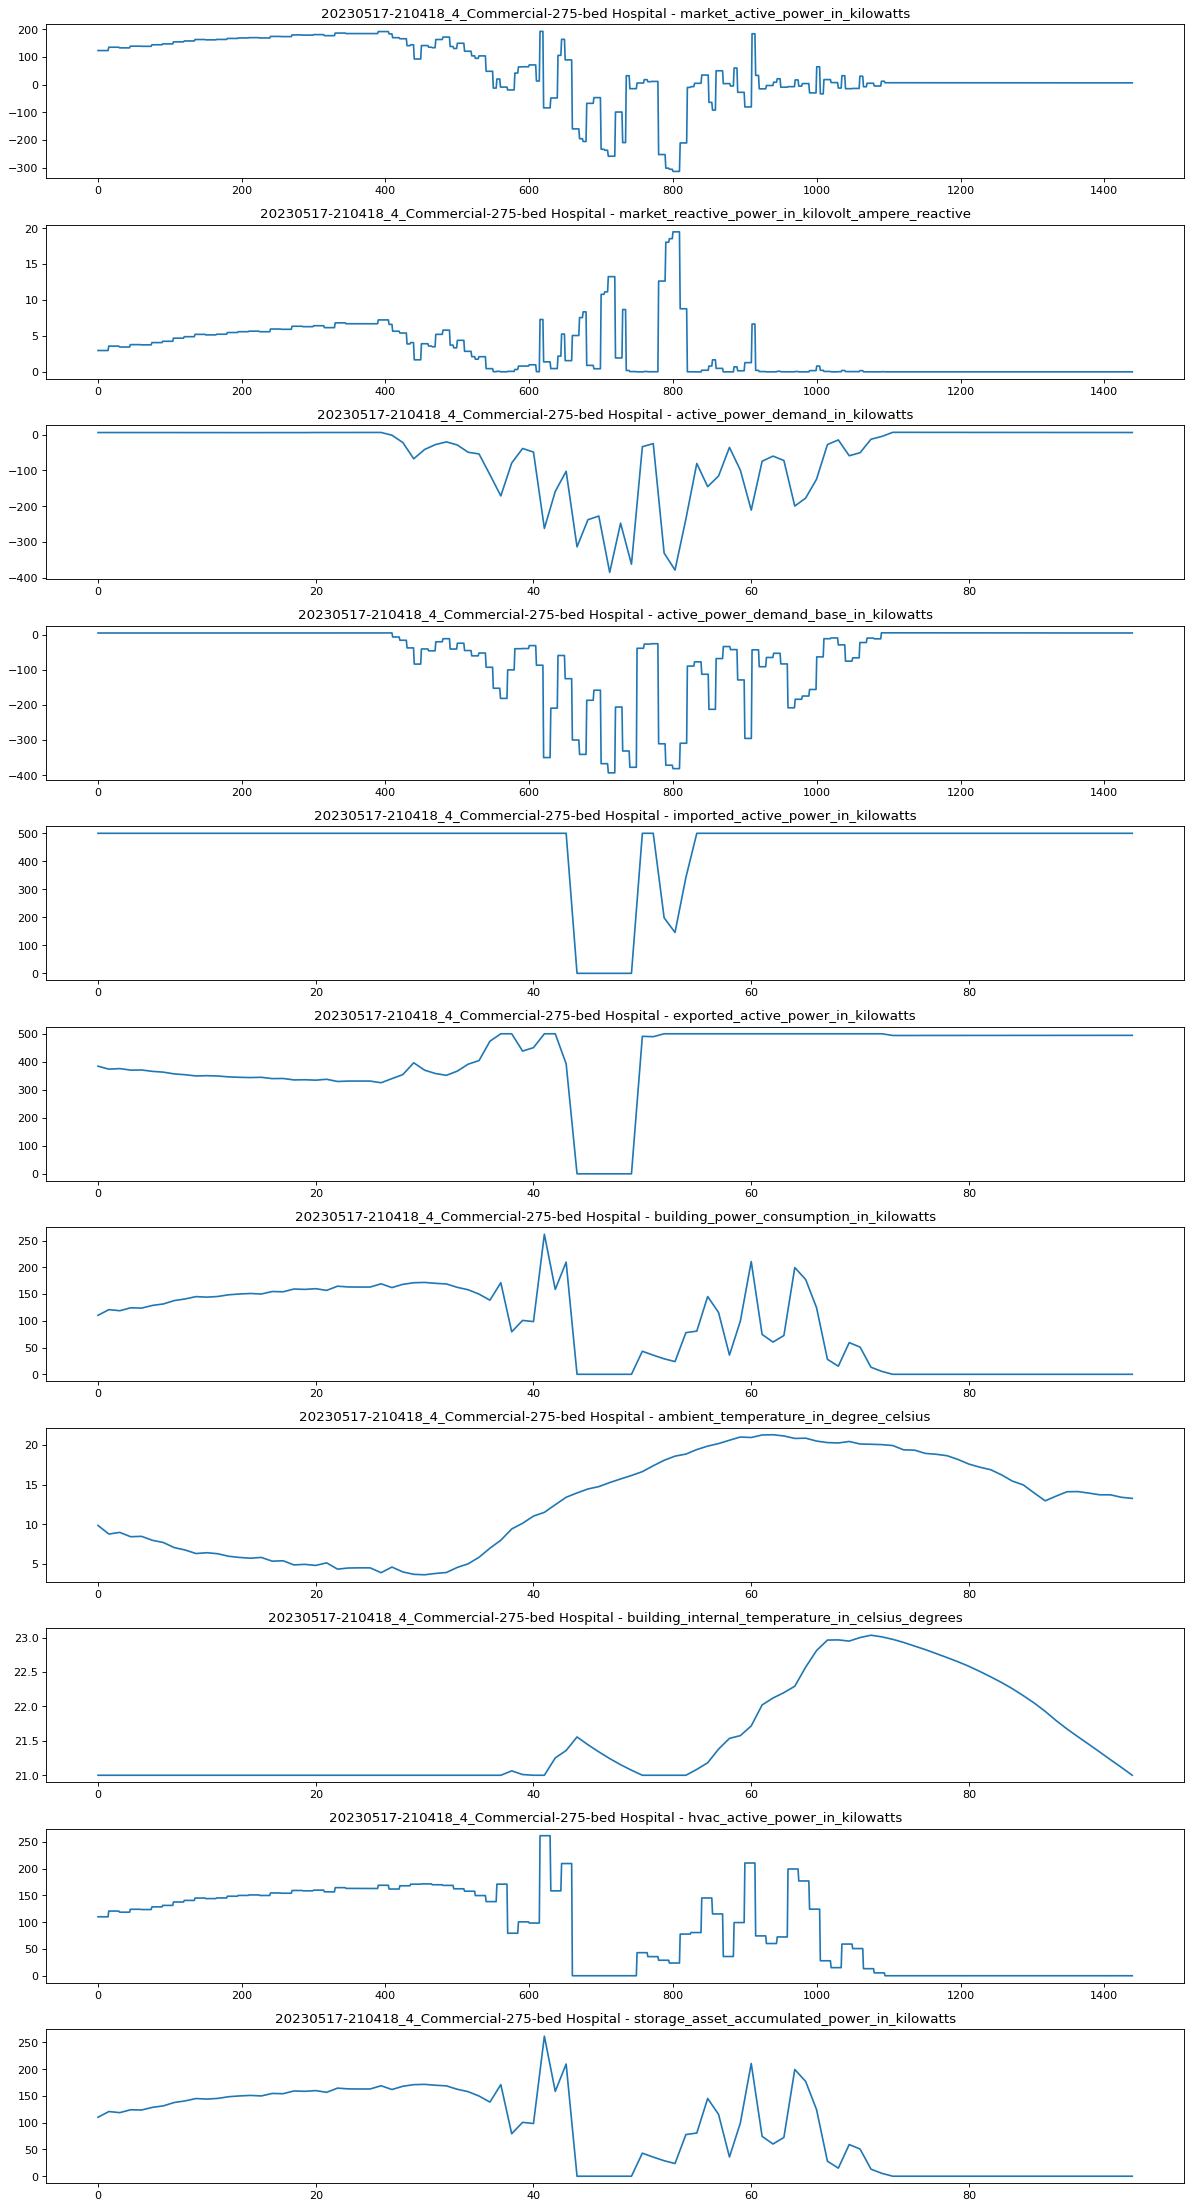

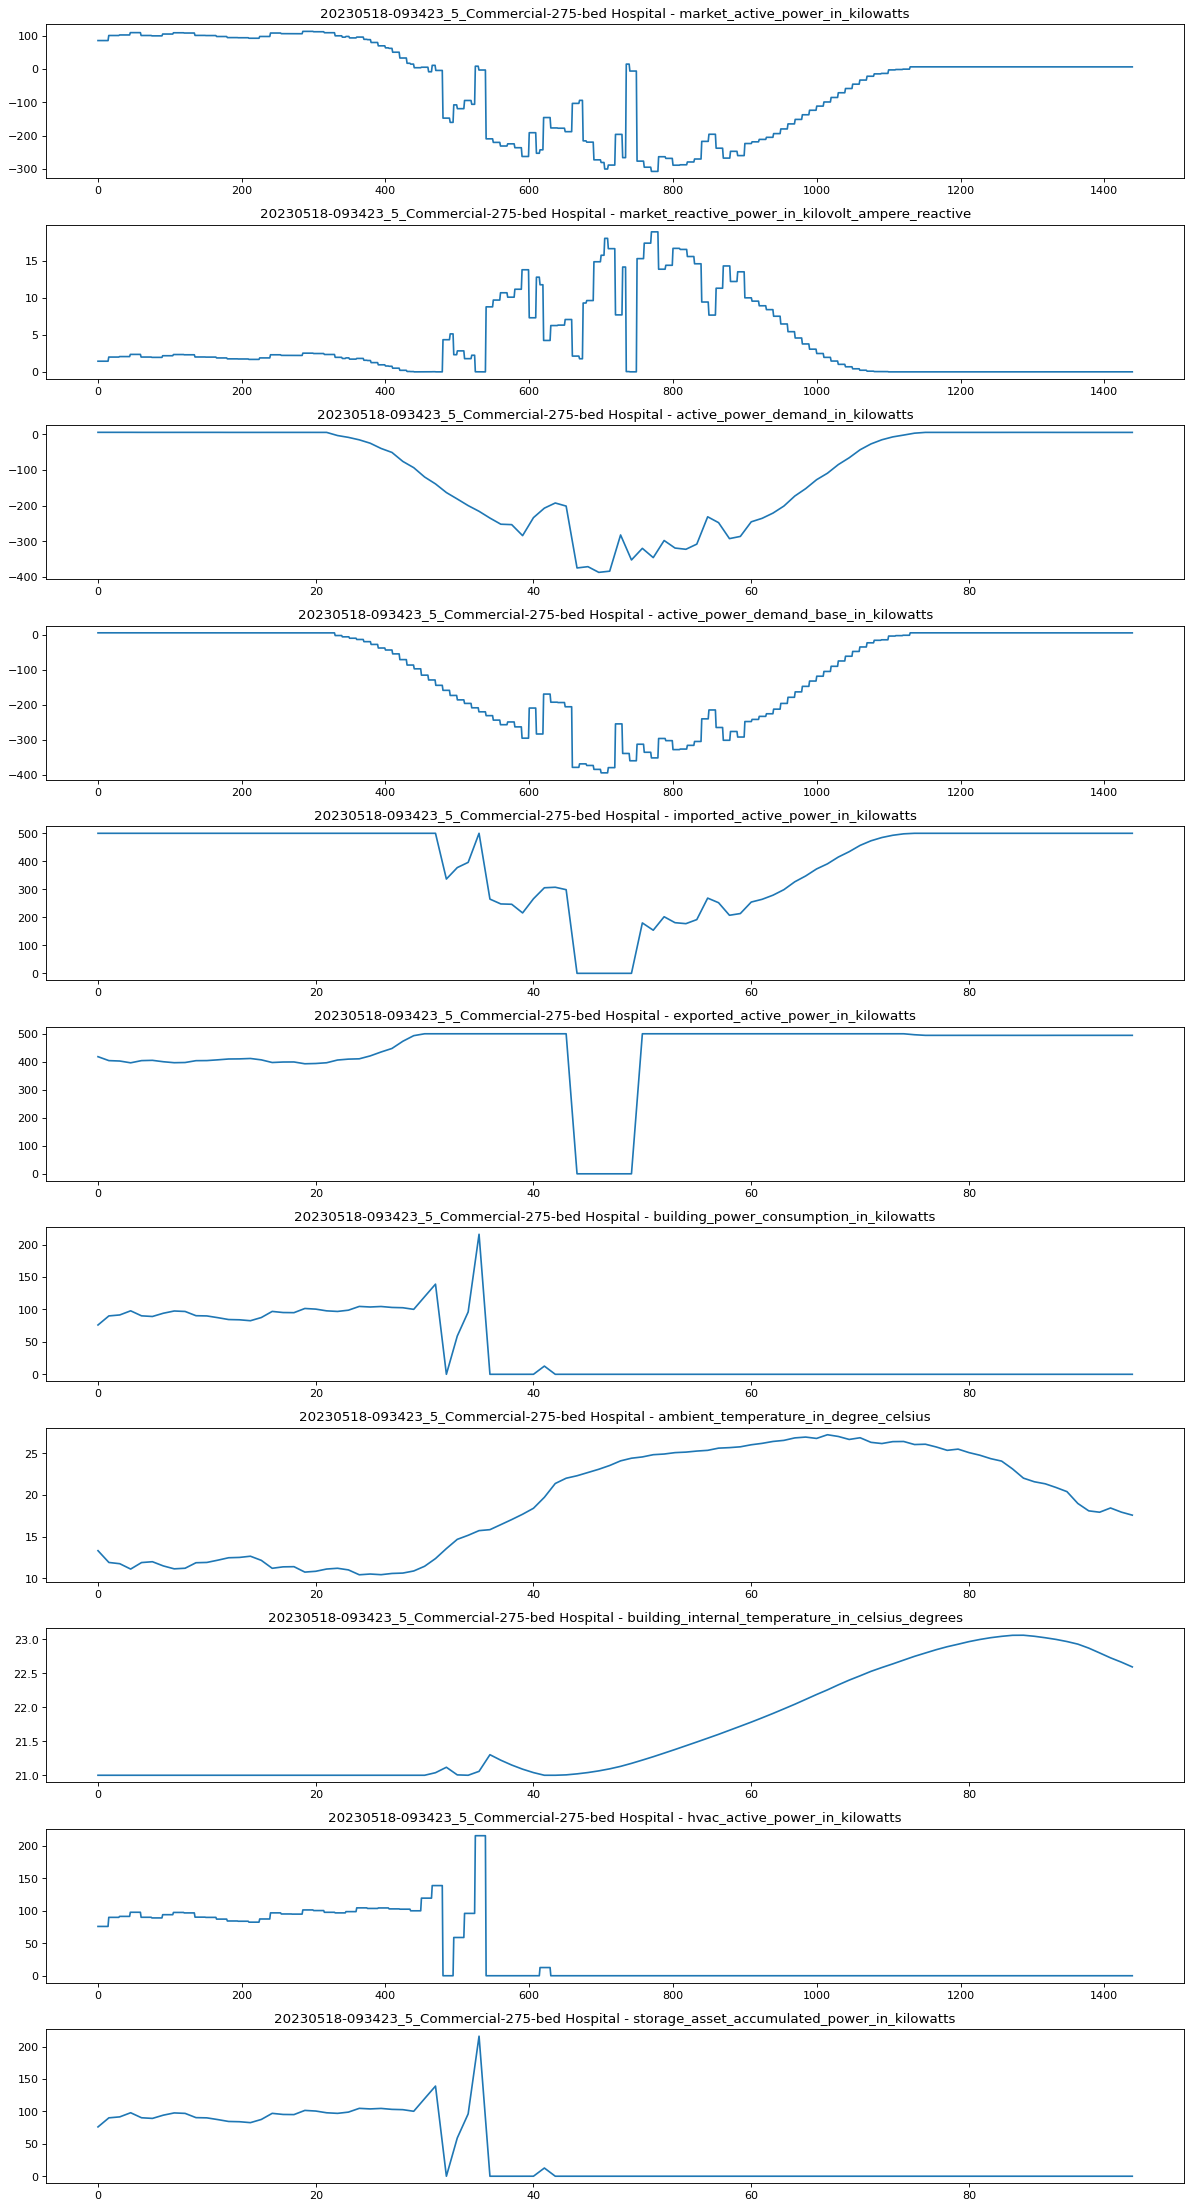

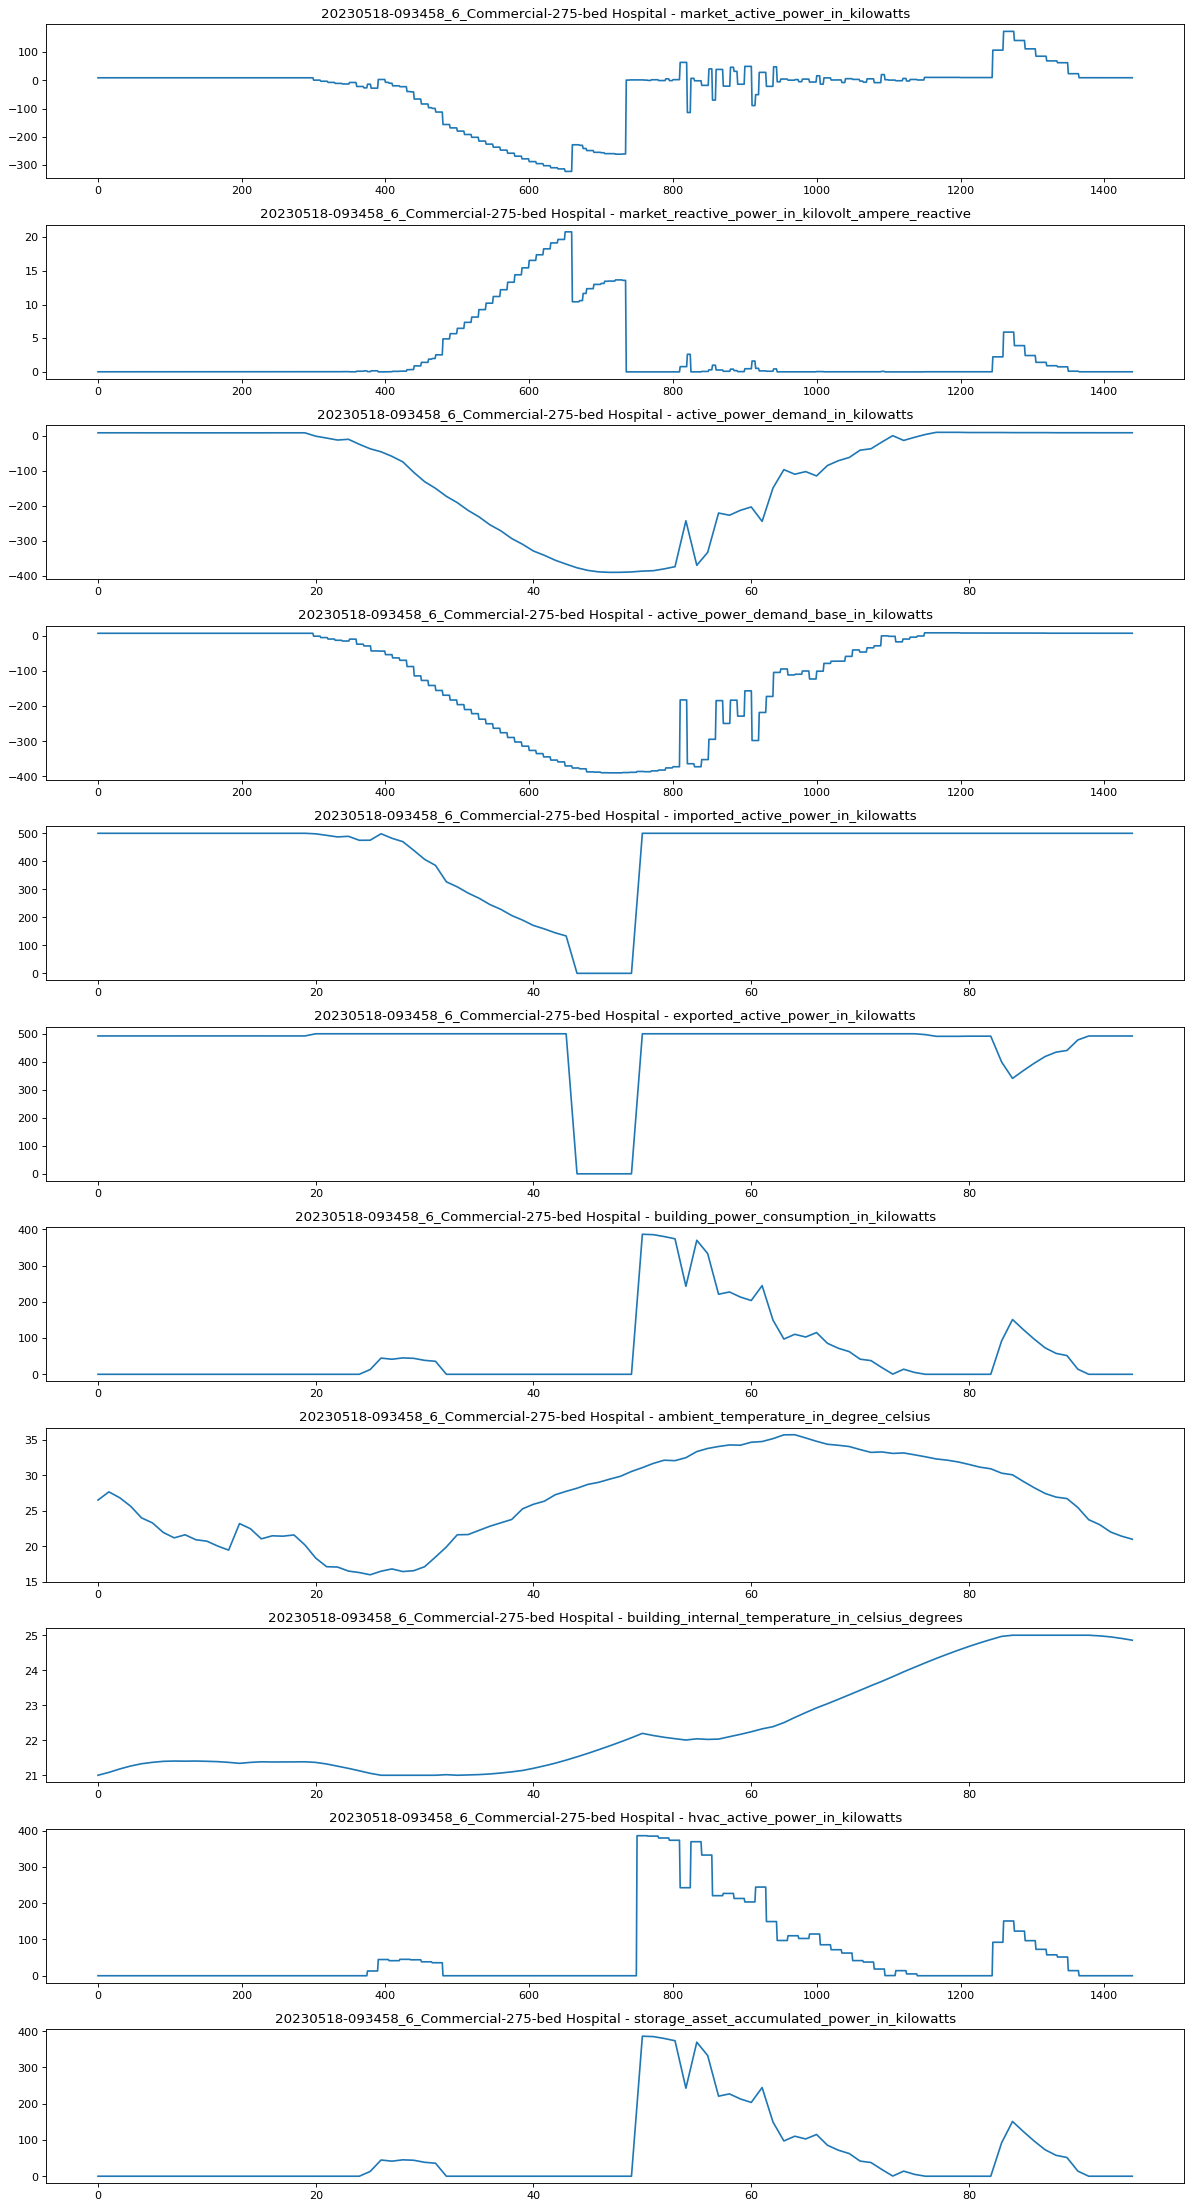

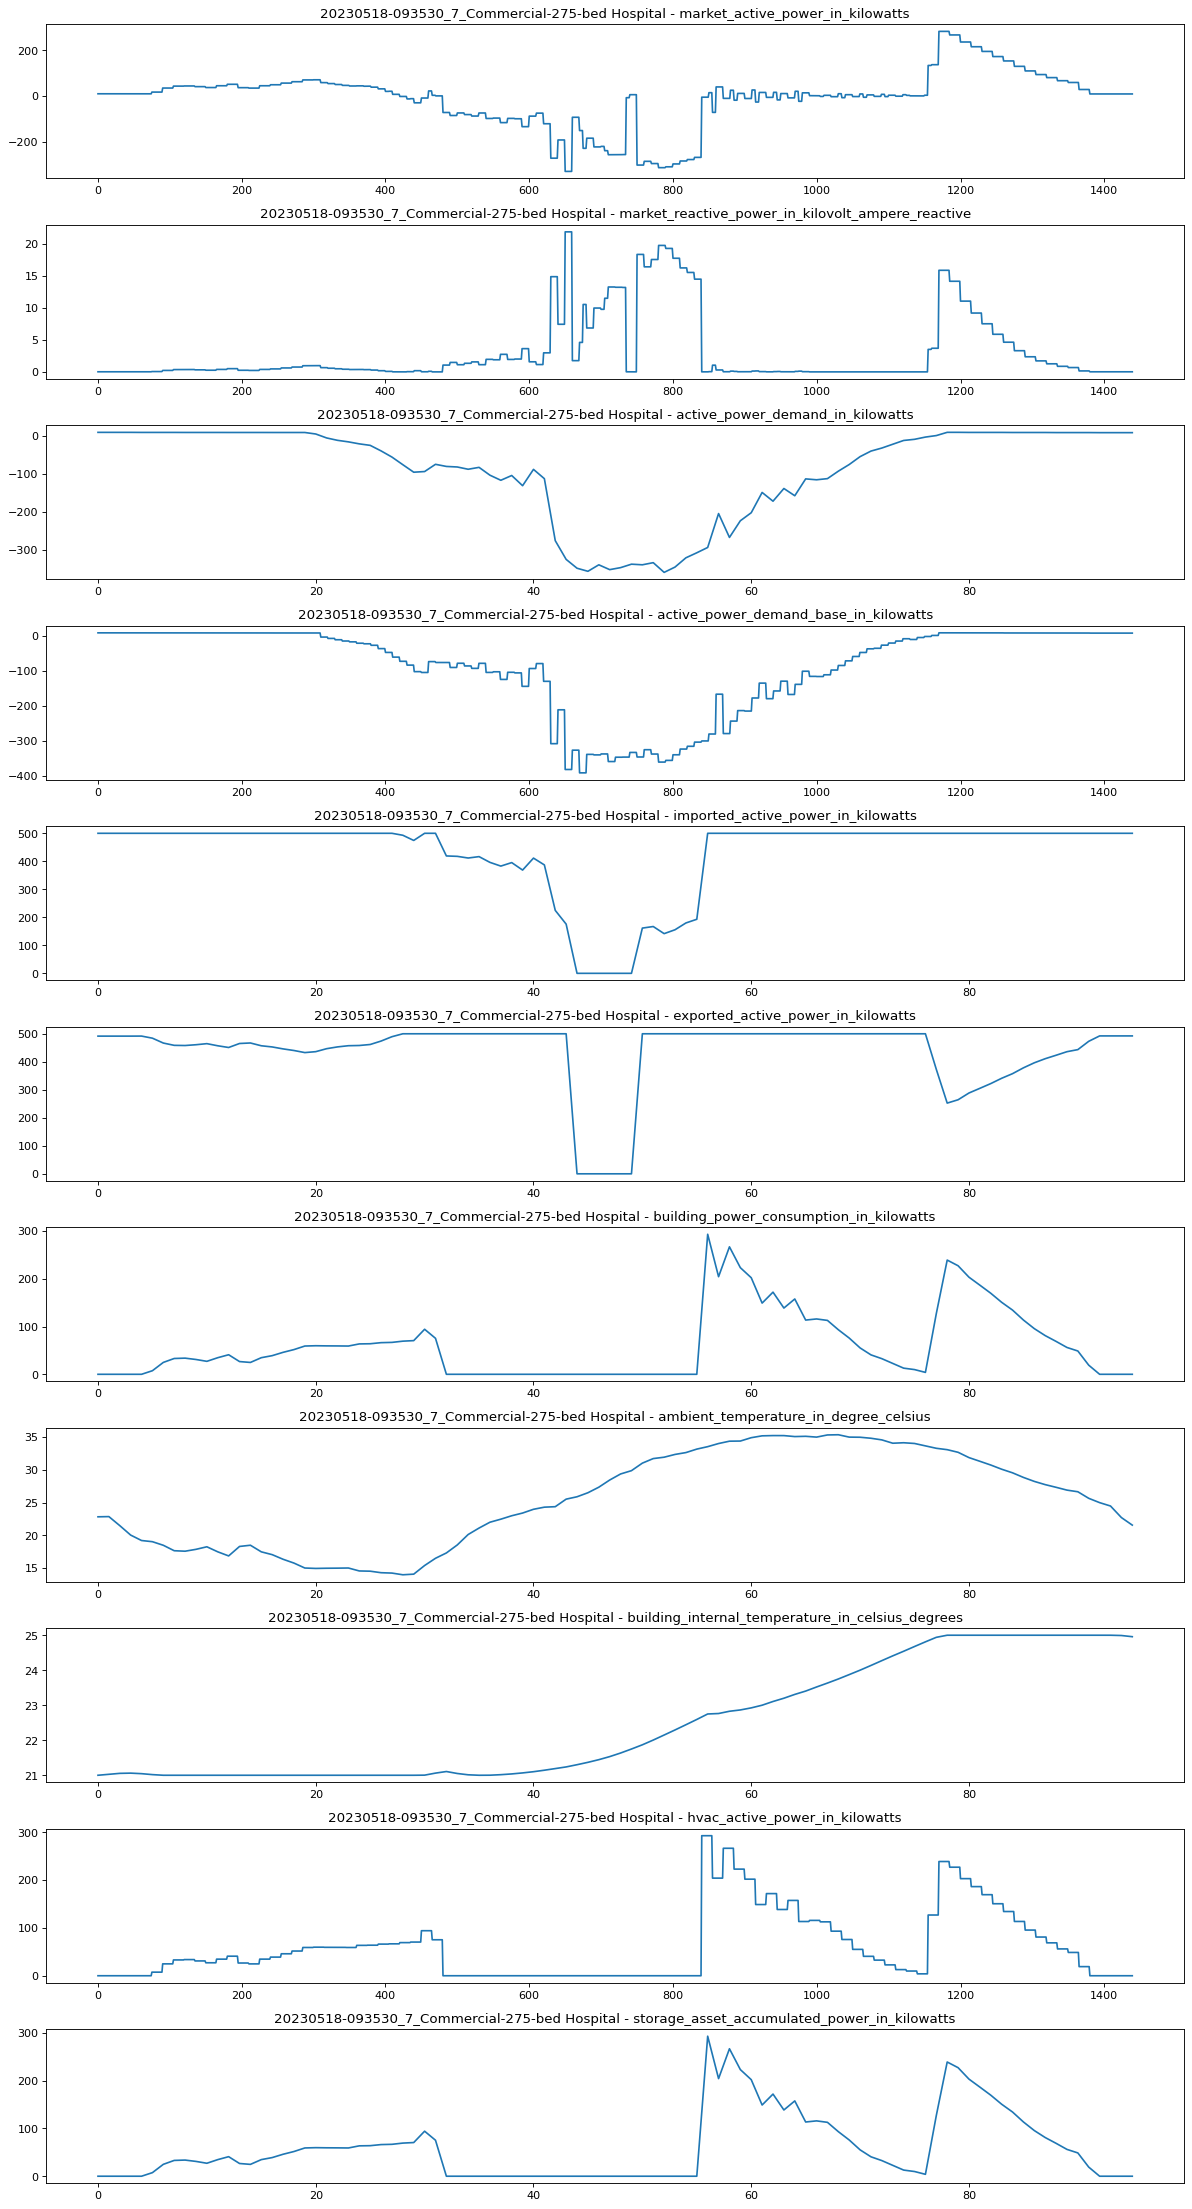

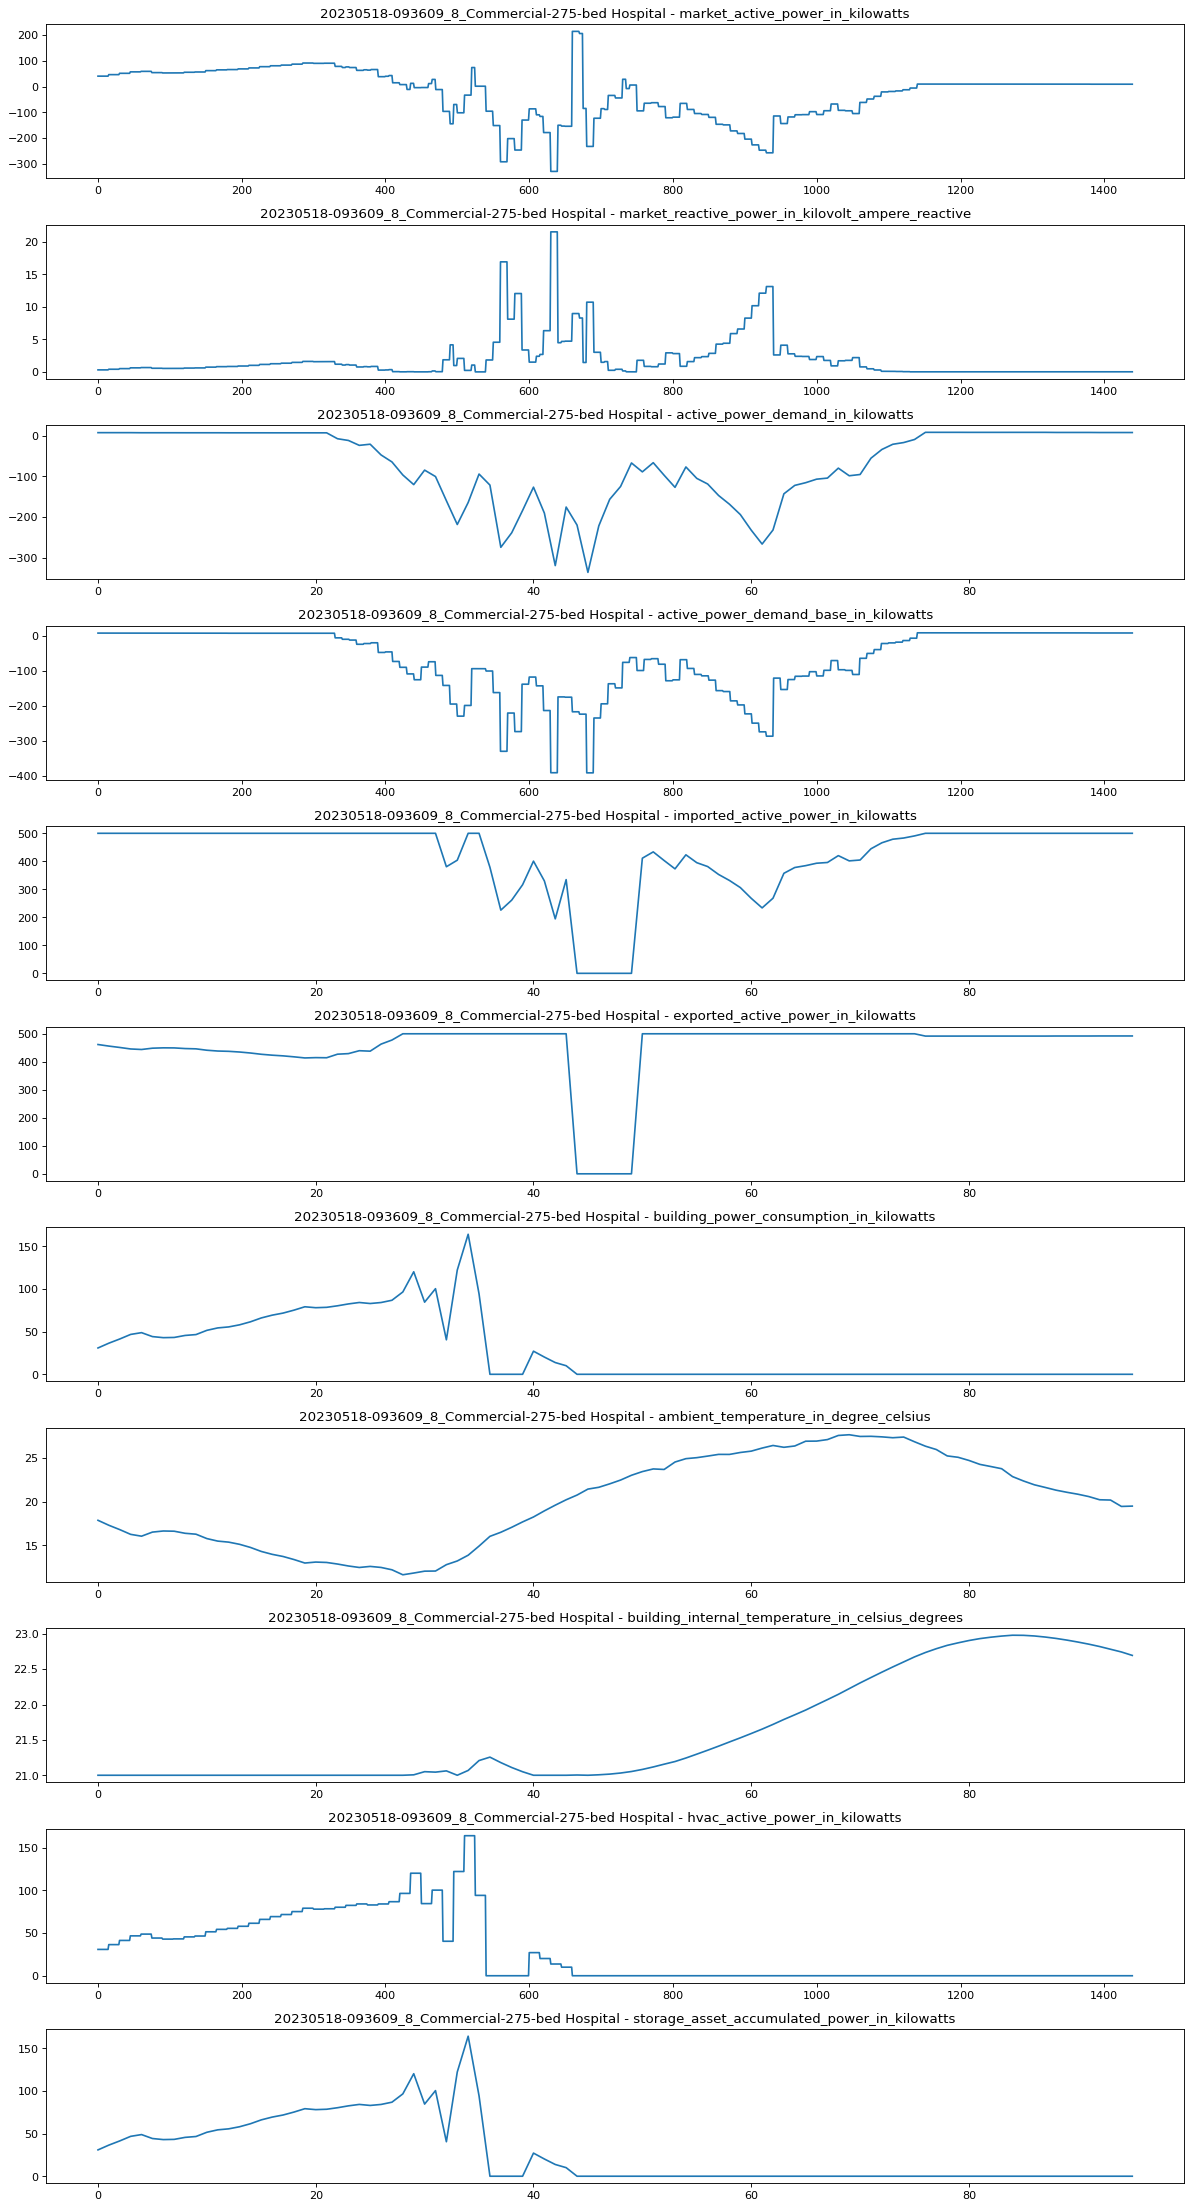

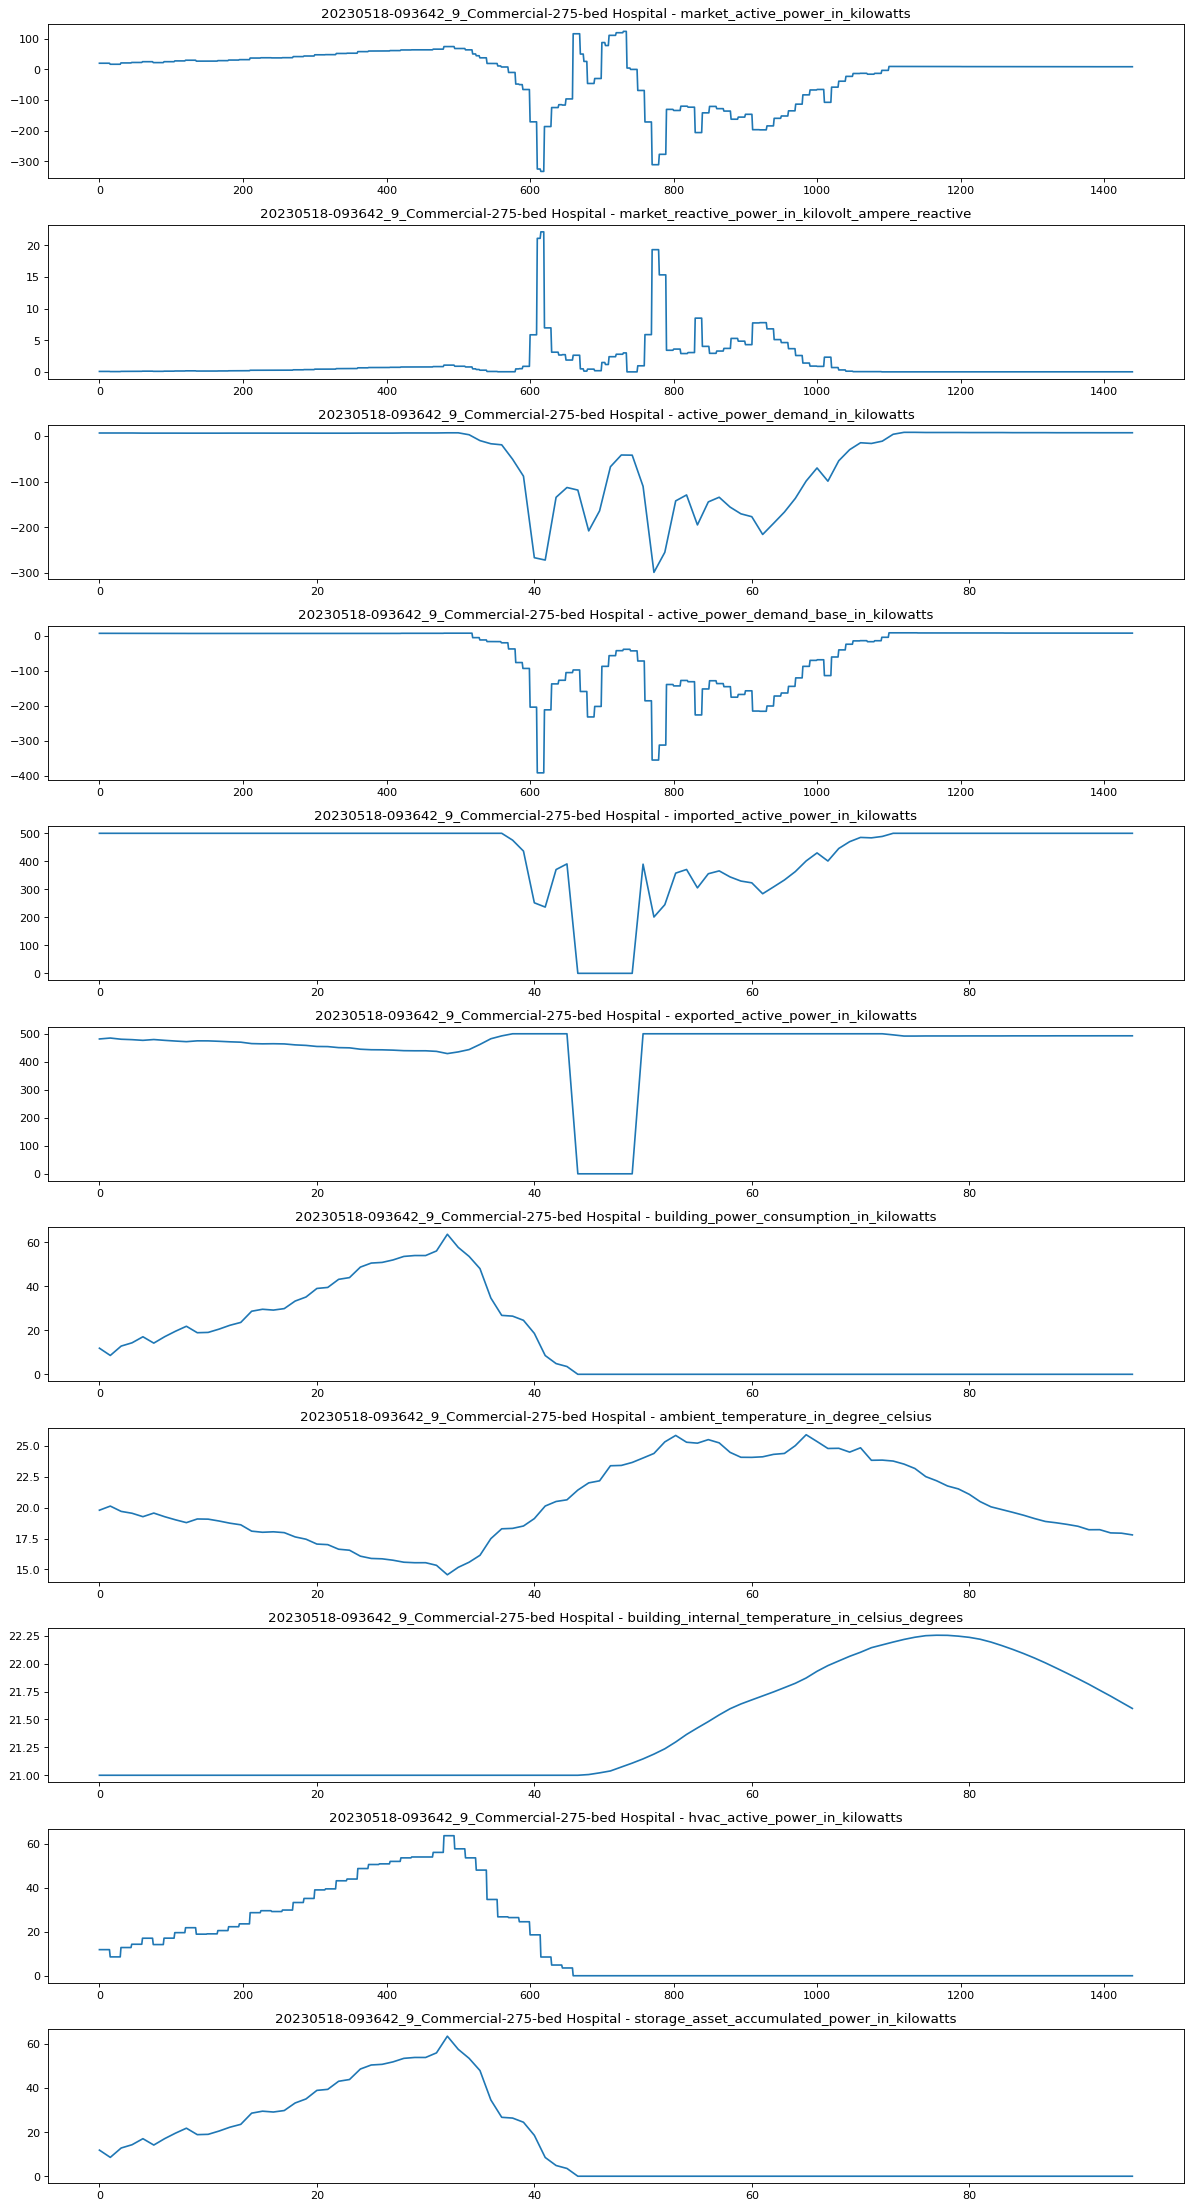

In [37]:
pp = PdfPages('test.pdf')

for number_of_row in np.arange(0, number_of_rows):
    row_data = data.iloc[number_of_row]
    figure = plt.figure(num=None, figsize=(15, 30), dpi=80, facecolor='w', edgecolor='k')
    for list_column_index in np.arange(0, len(list_columns)):
        list_column = list_columns[list_column_index]
        plt.subplot(12, 1, list_column_index + 1)
        plt.plot(row_data[list_column])
        case_name = row_data['FolderName']
        plt.title(f'{case_name} - {list_column}')
        figure.tight_layout()

In [41]:
number_of_rows

9

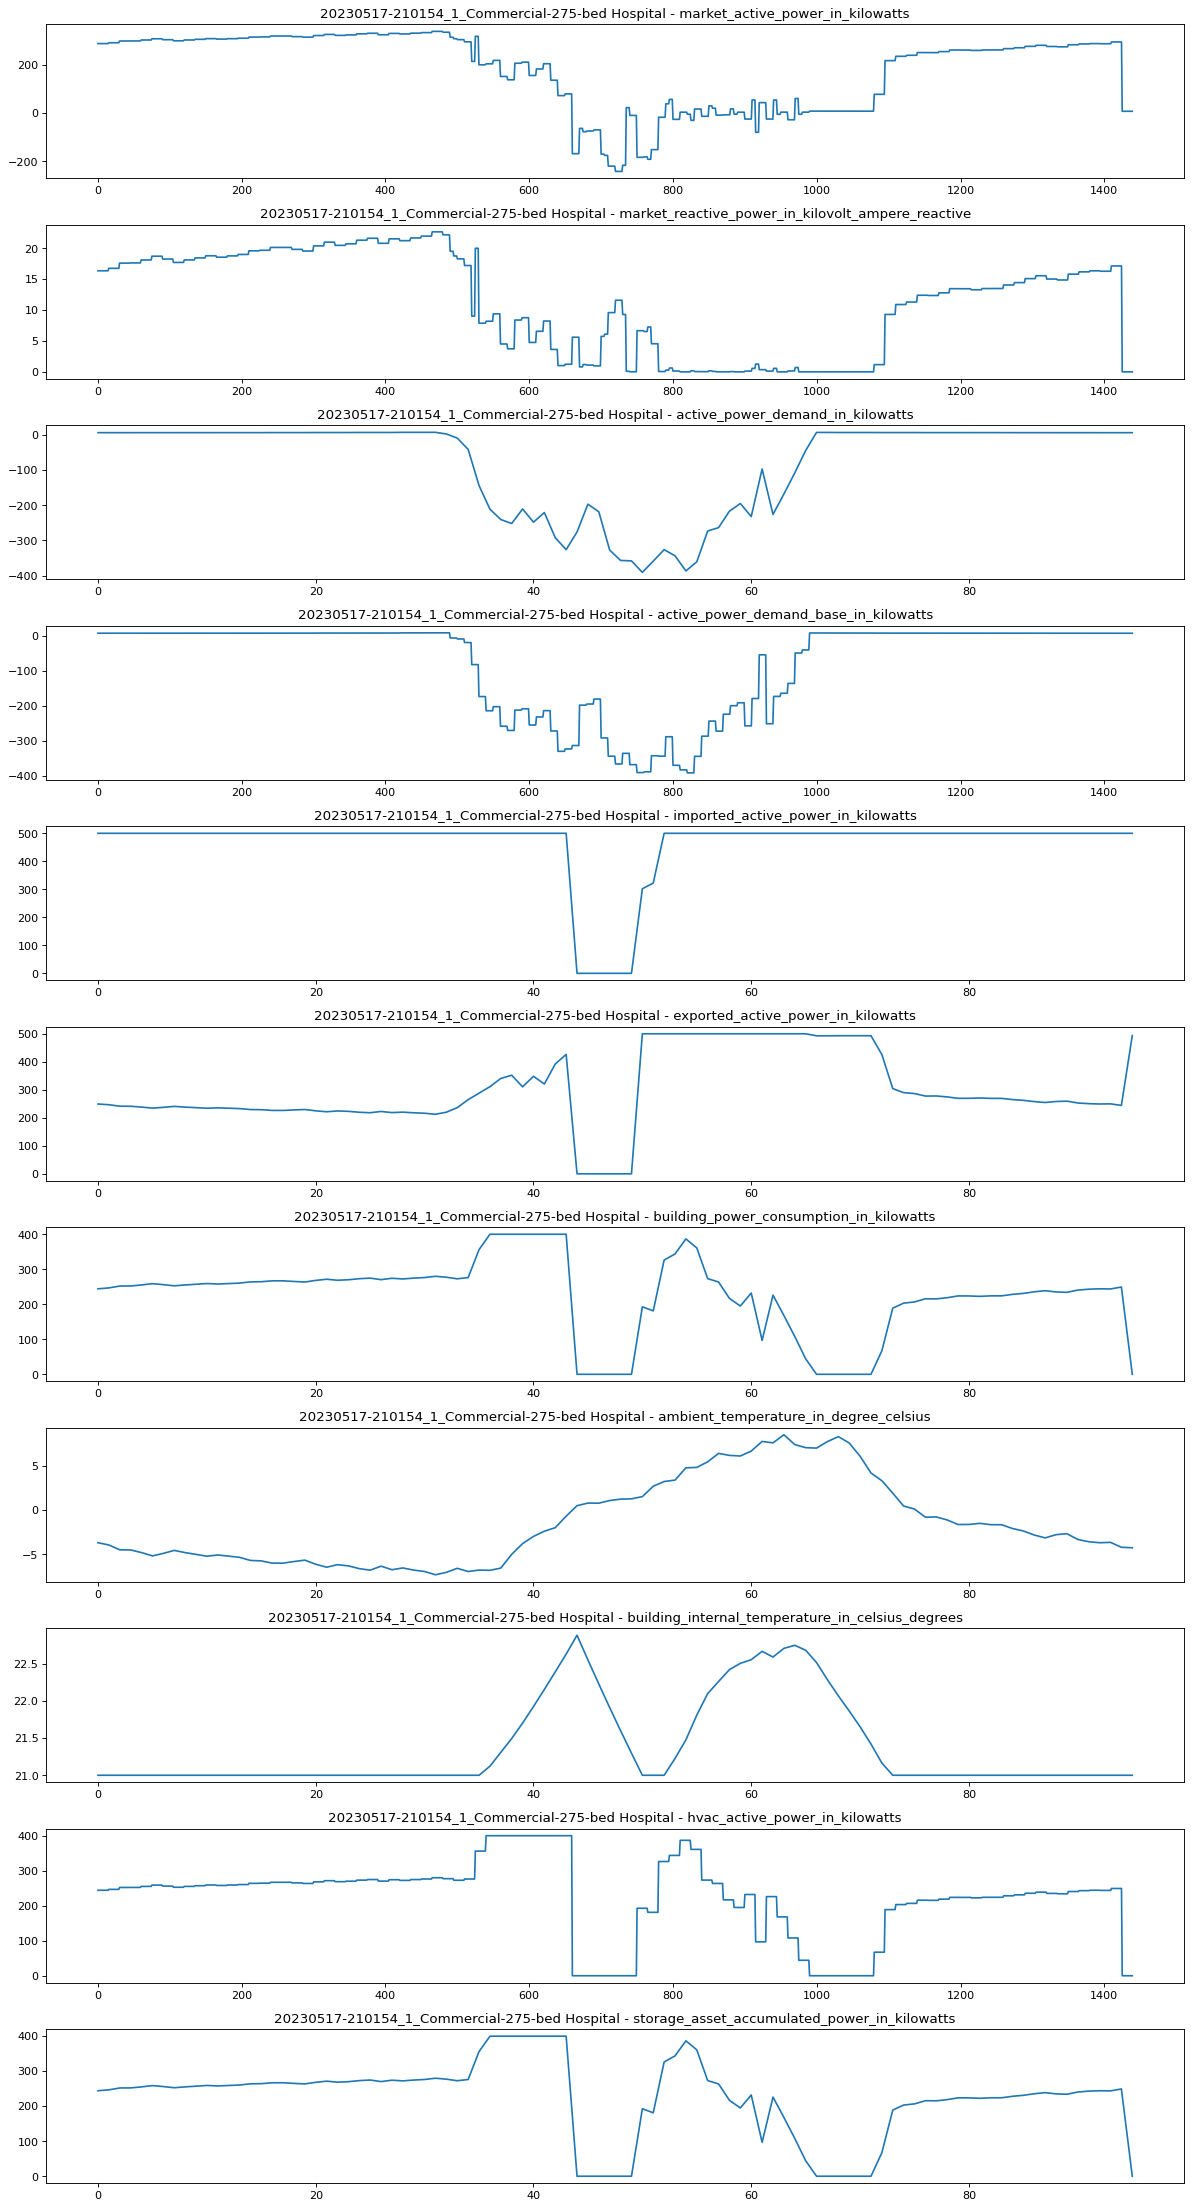

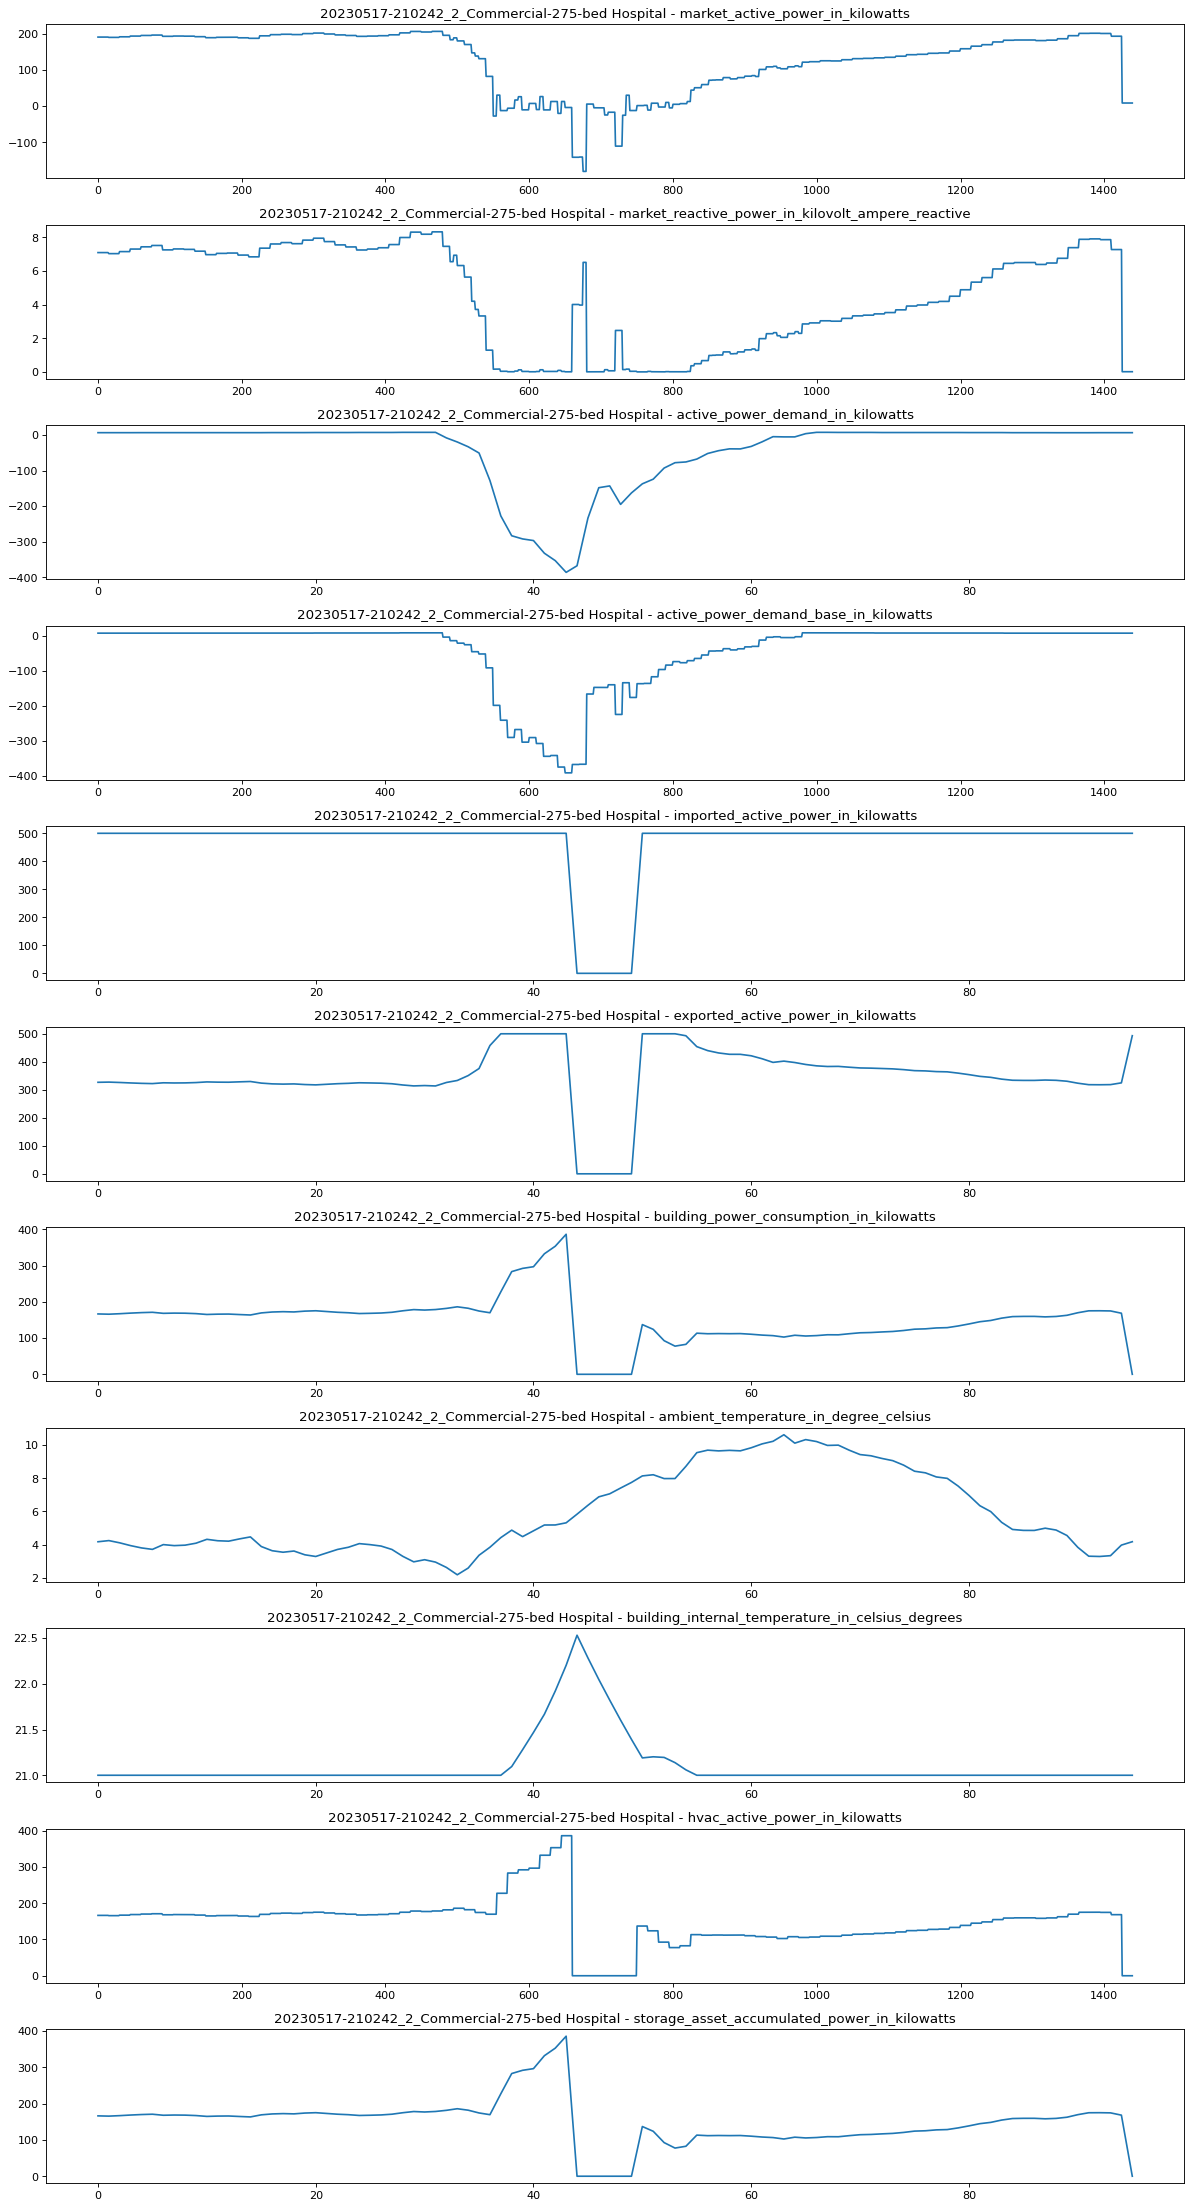

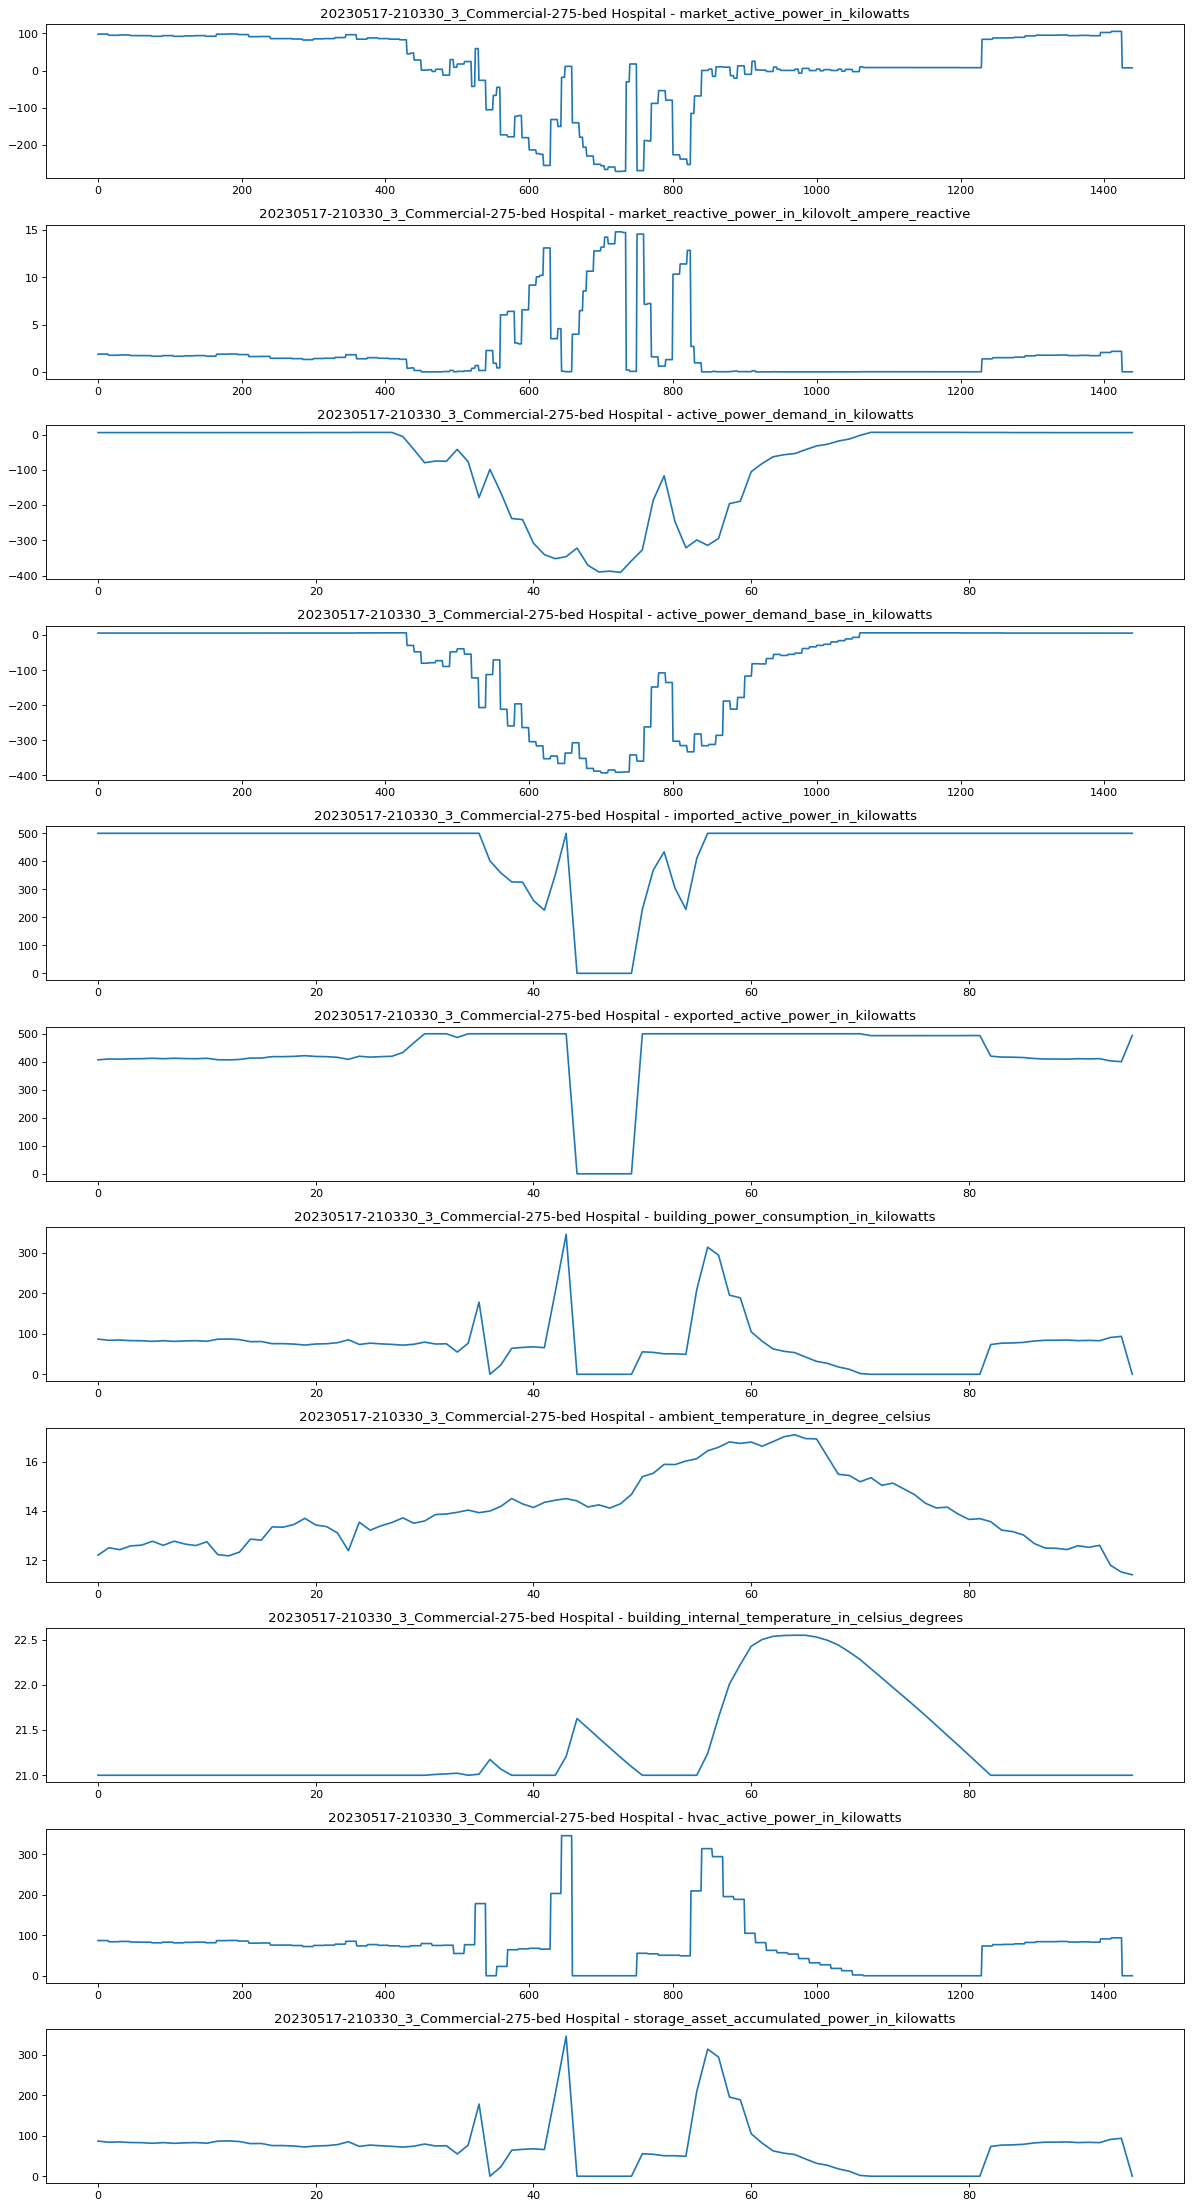

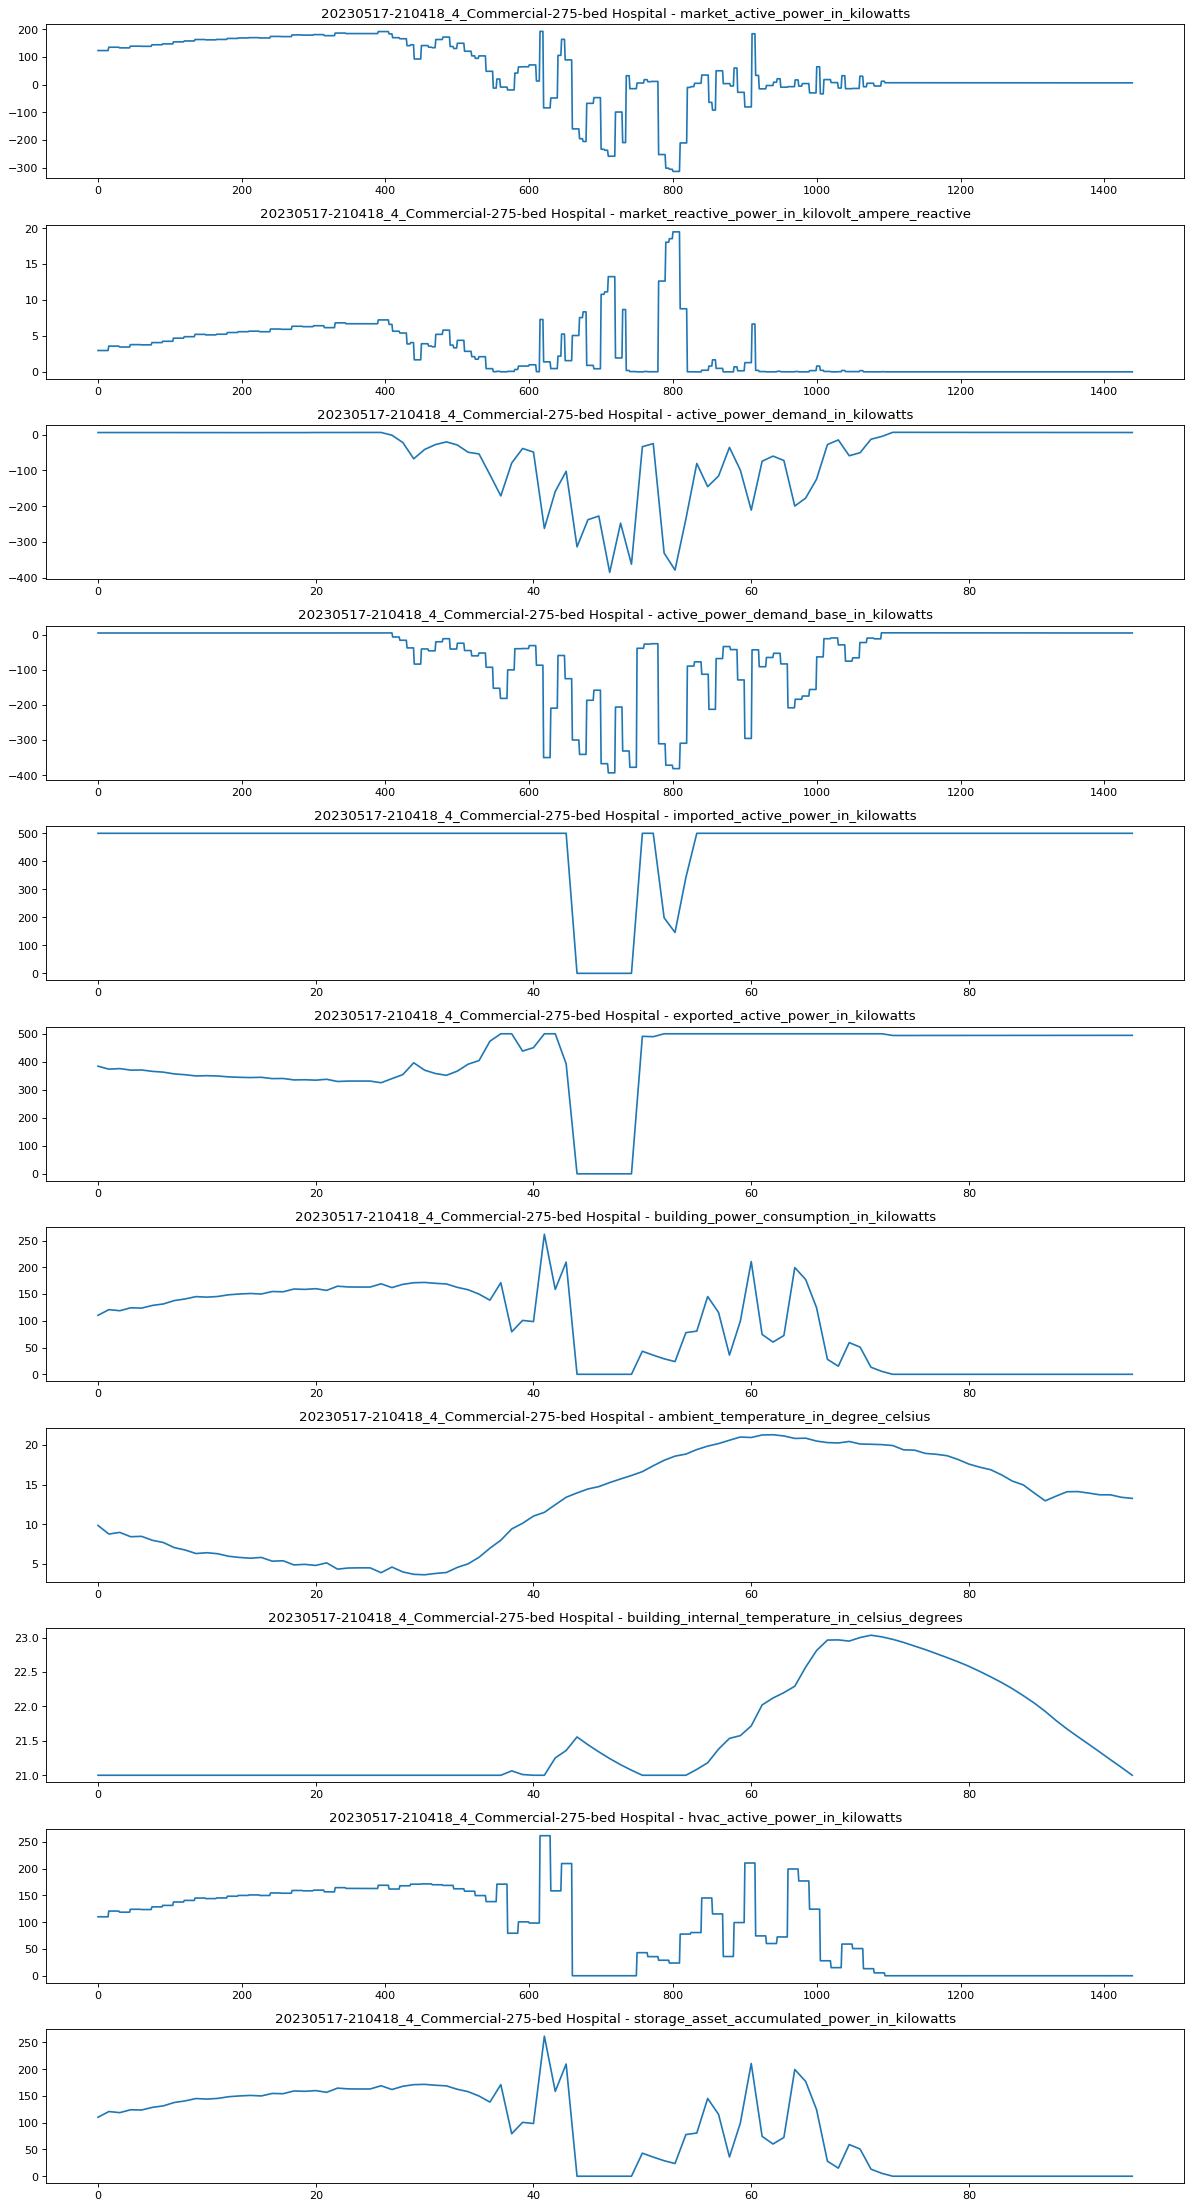

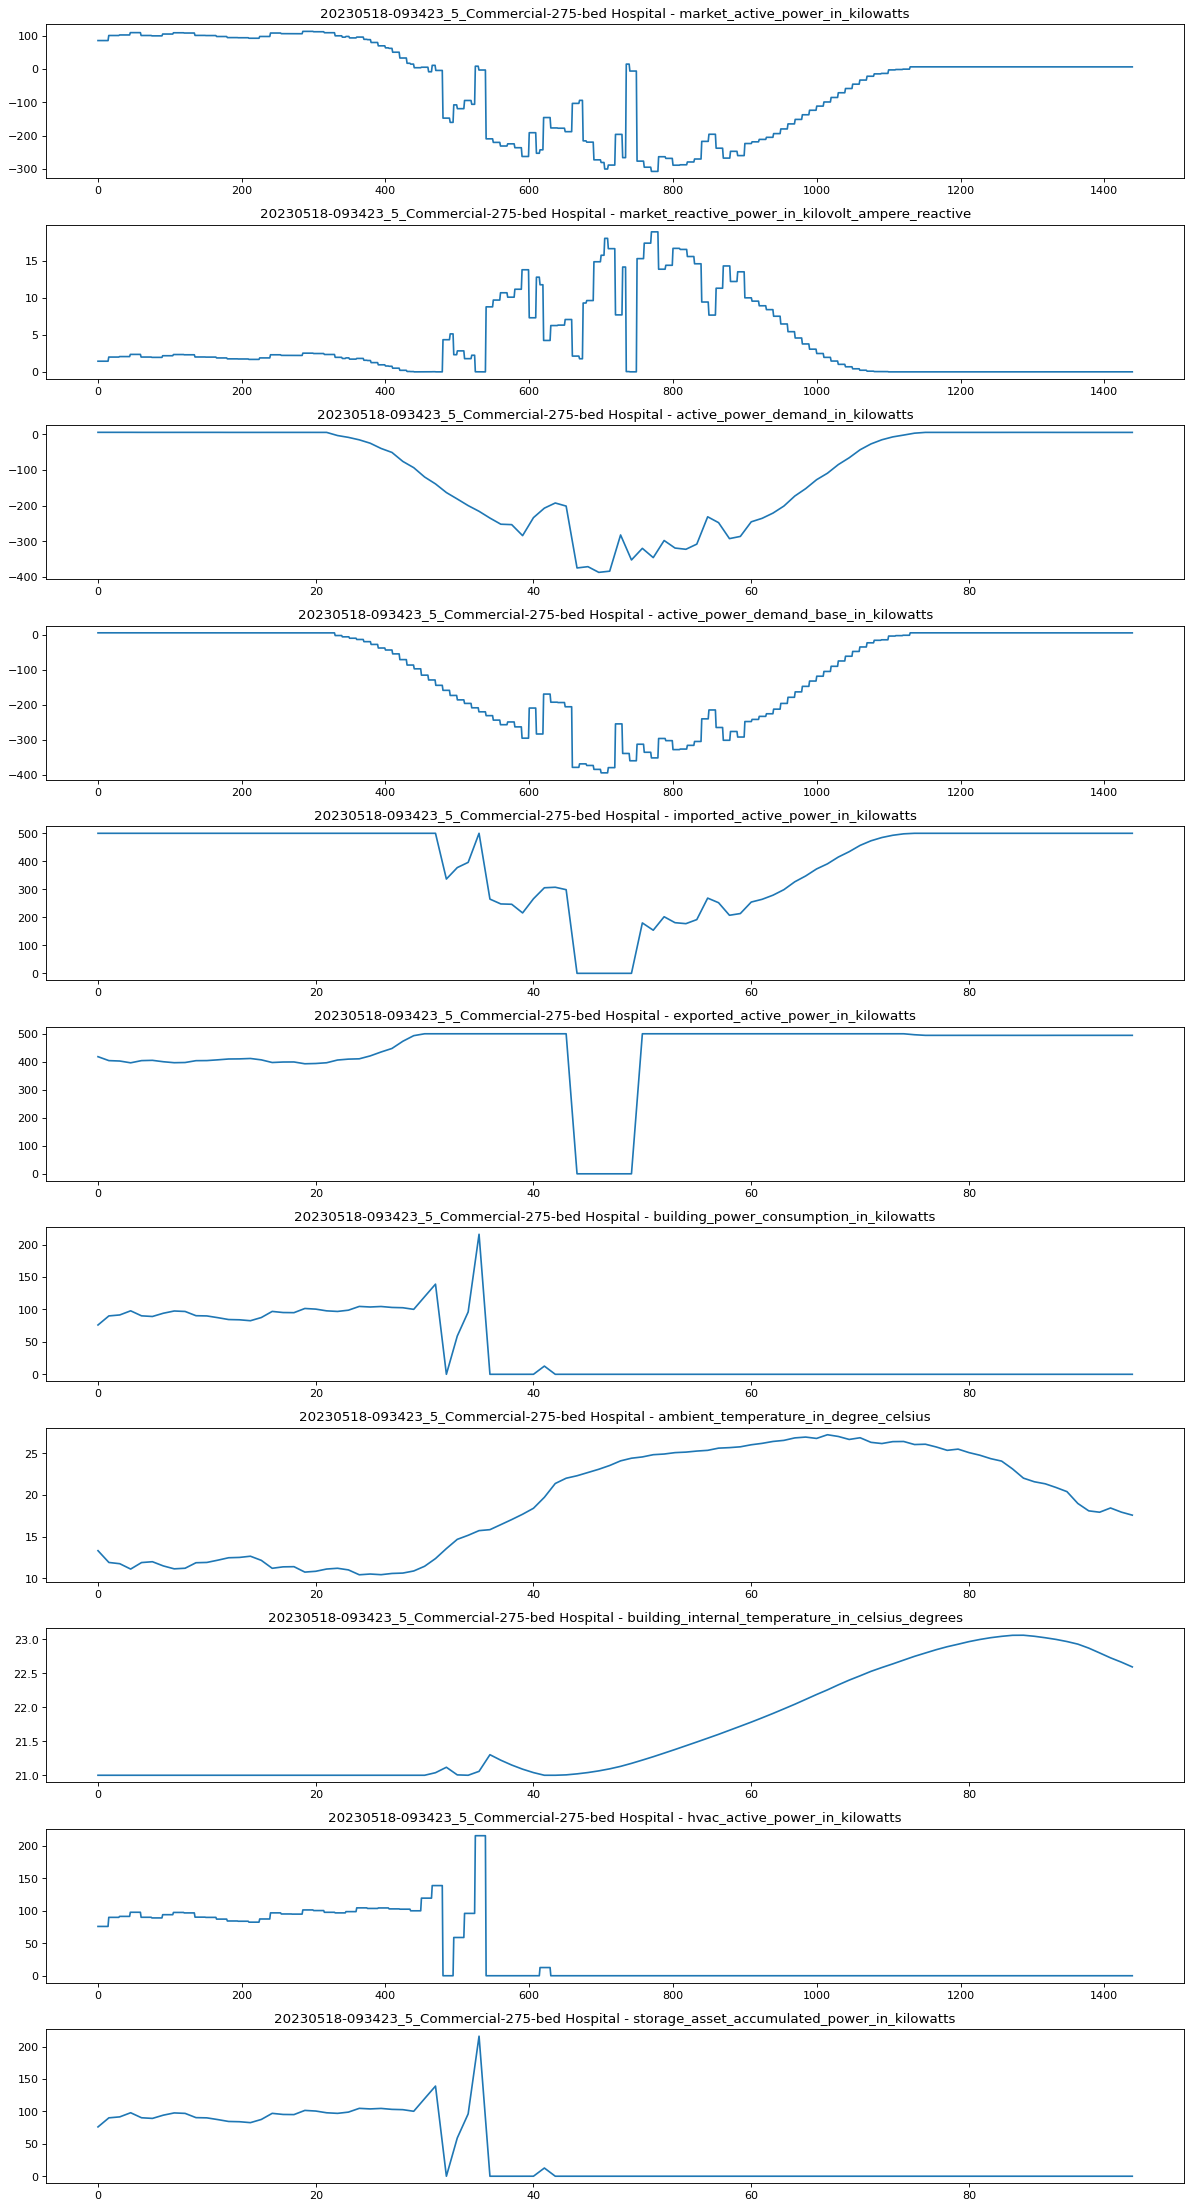

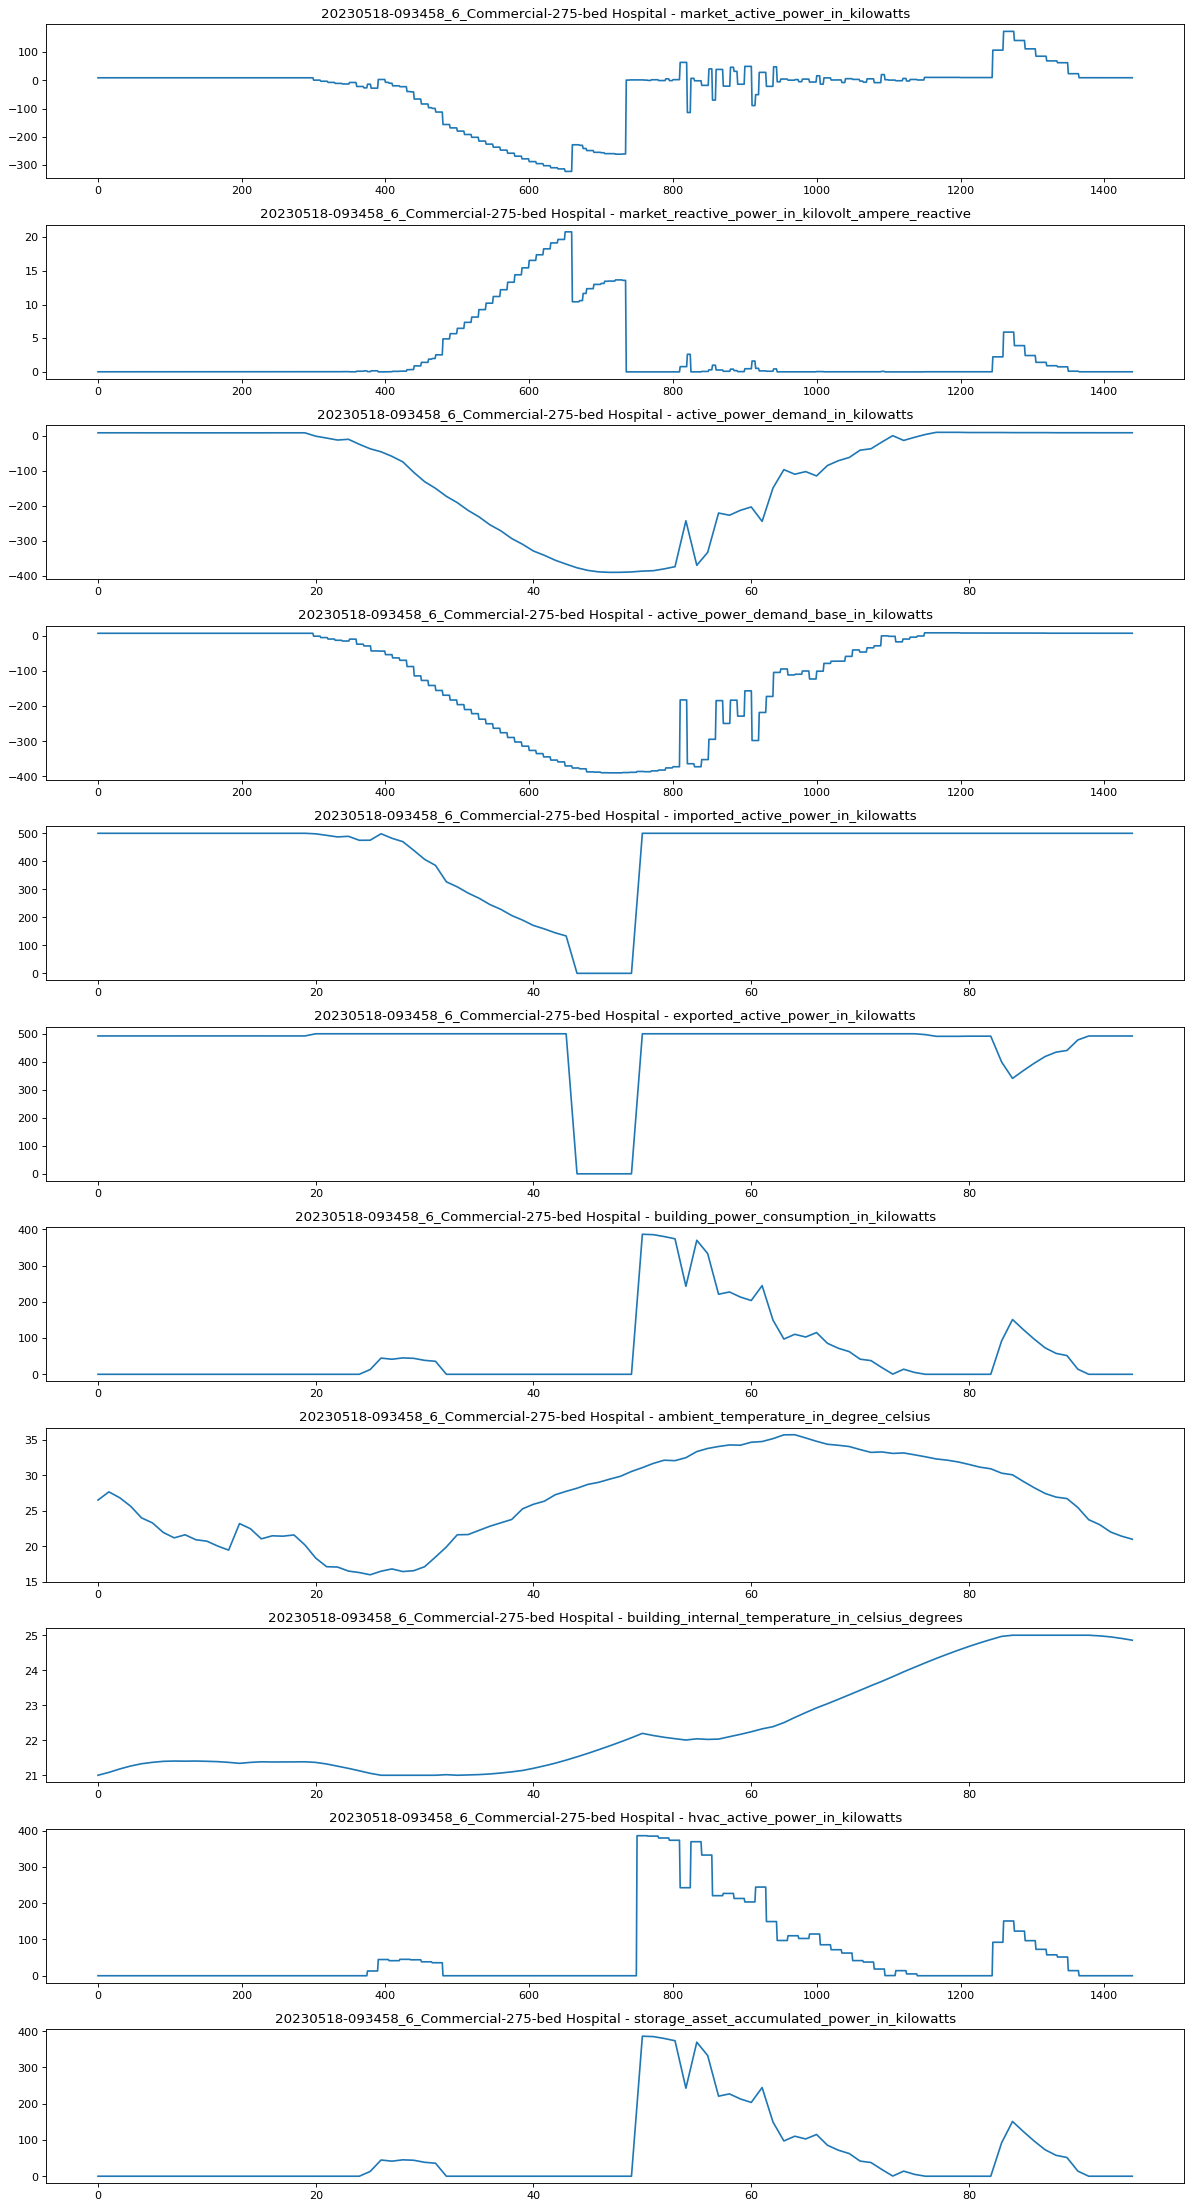

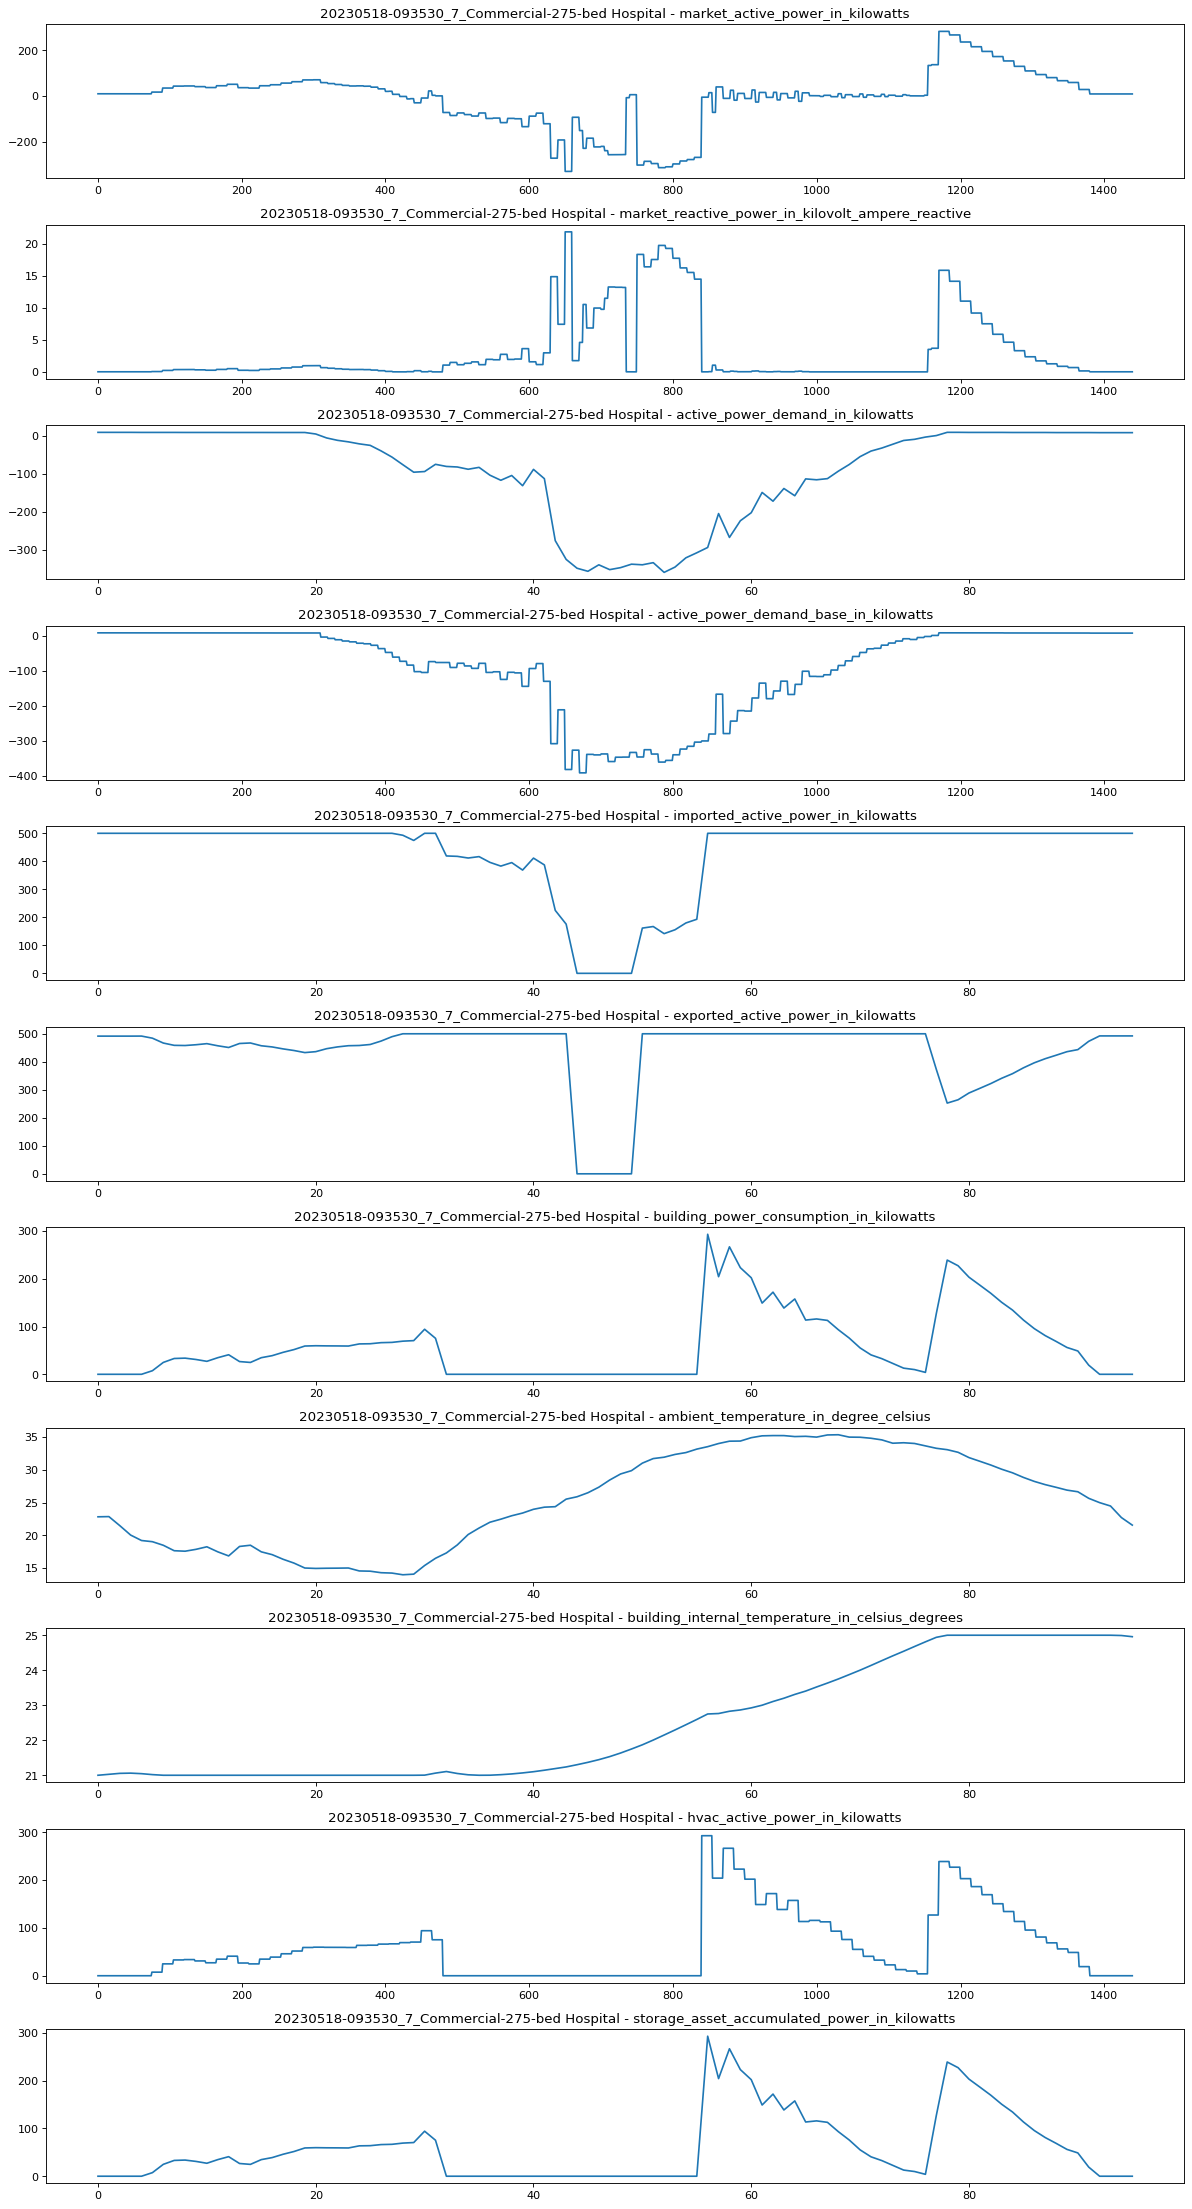

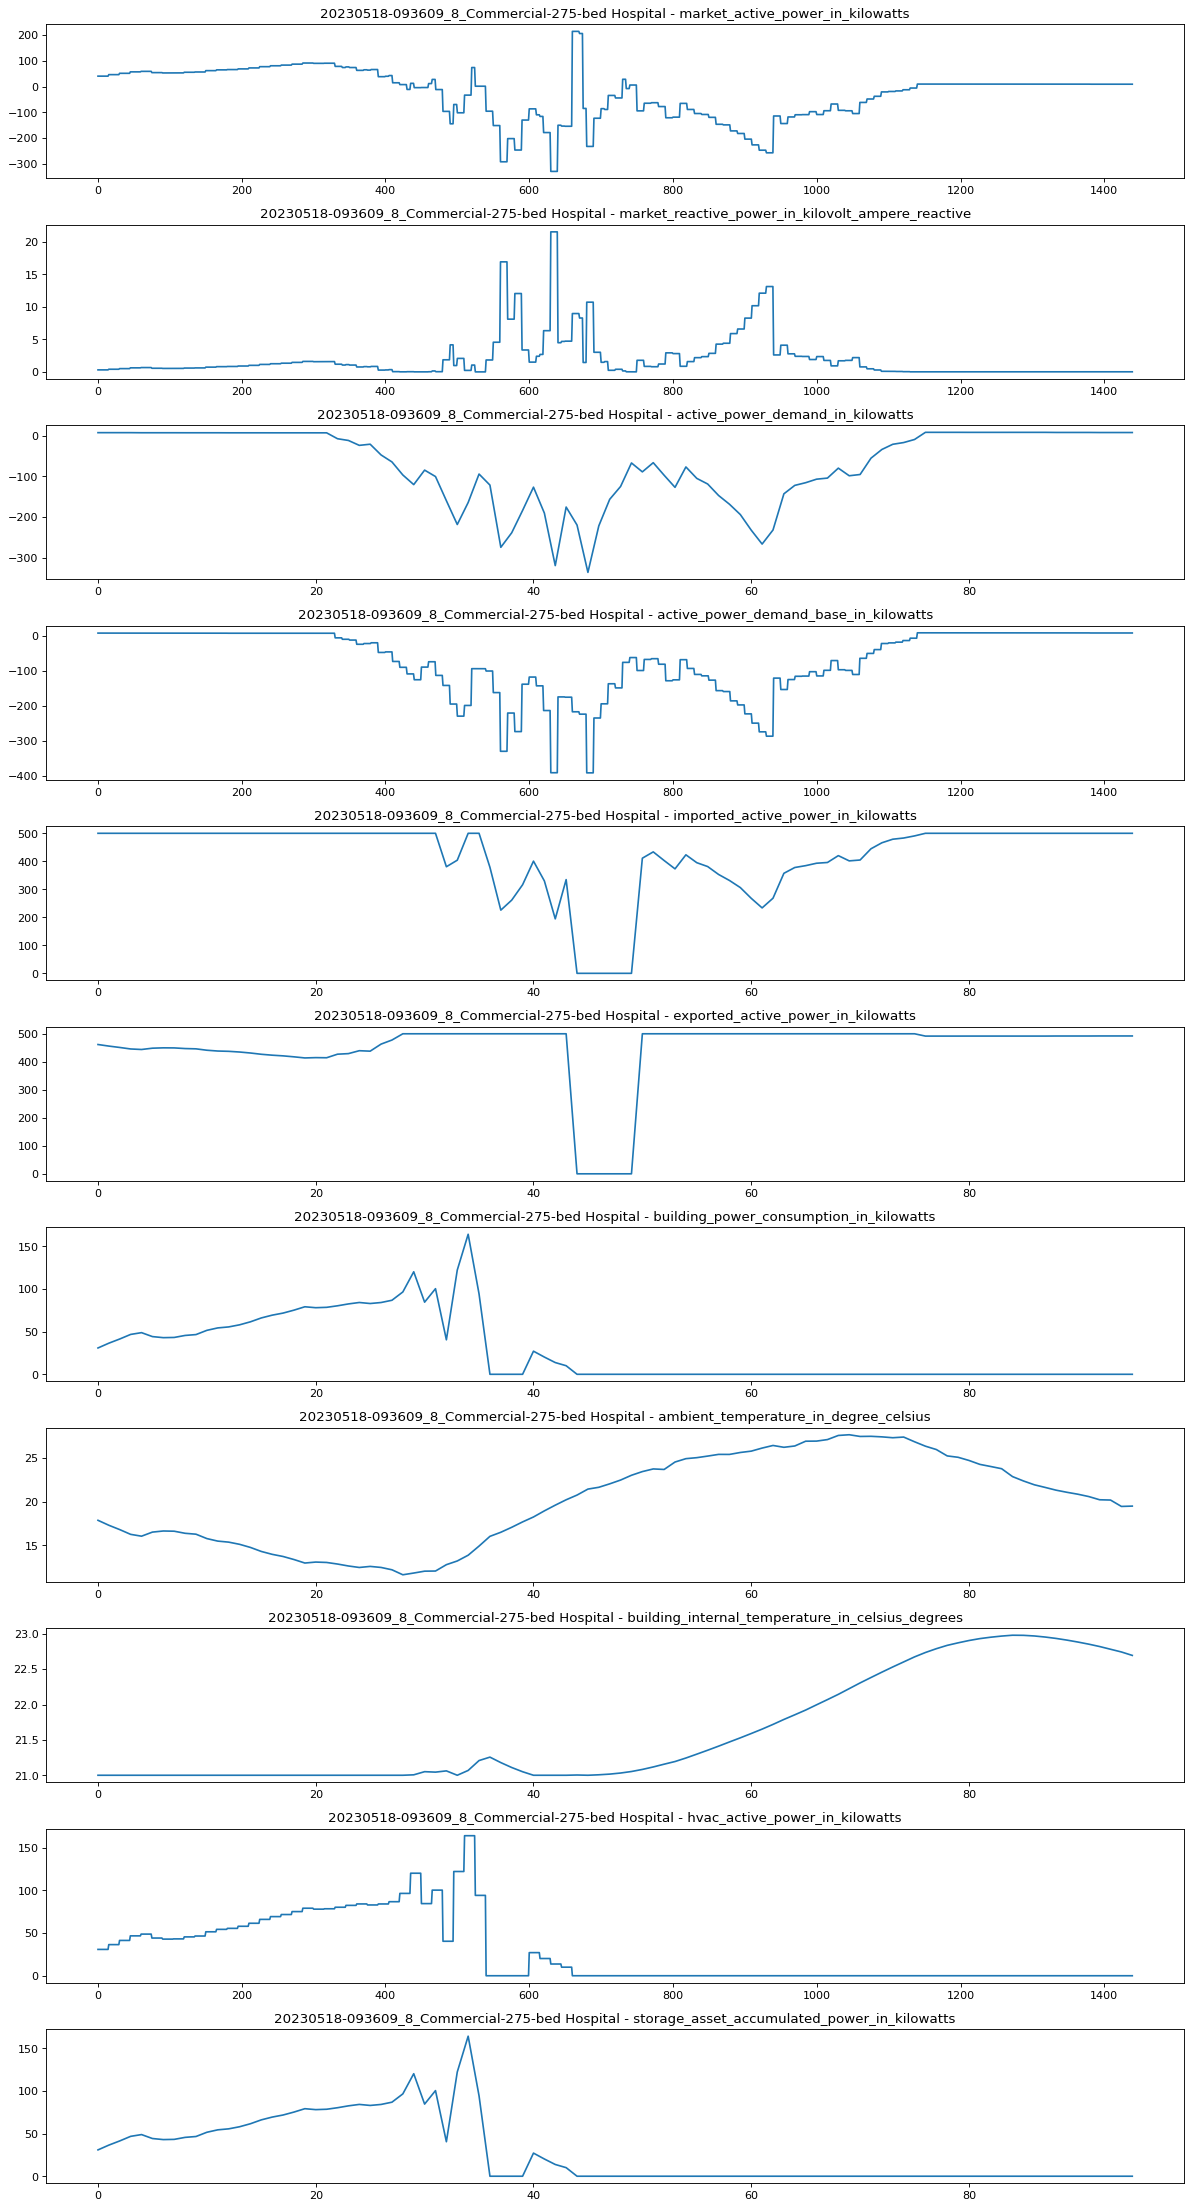

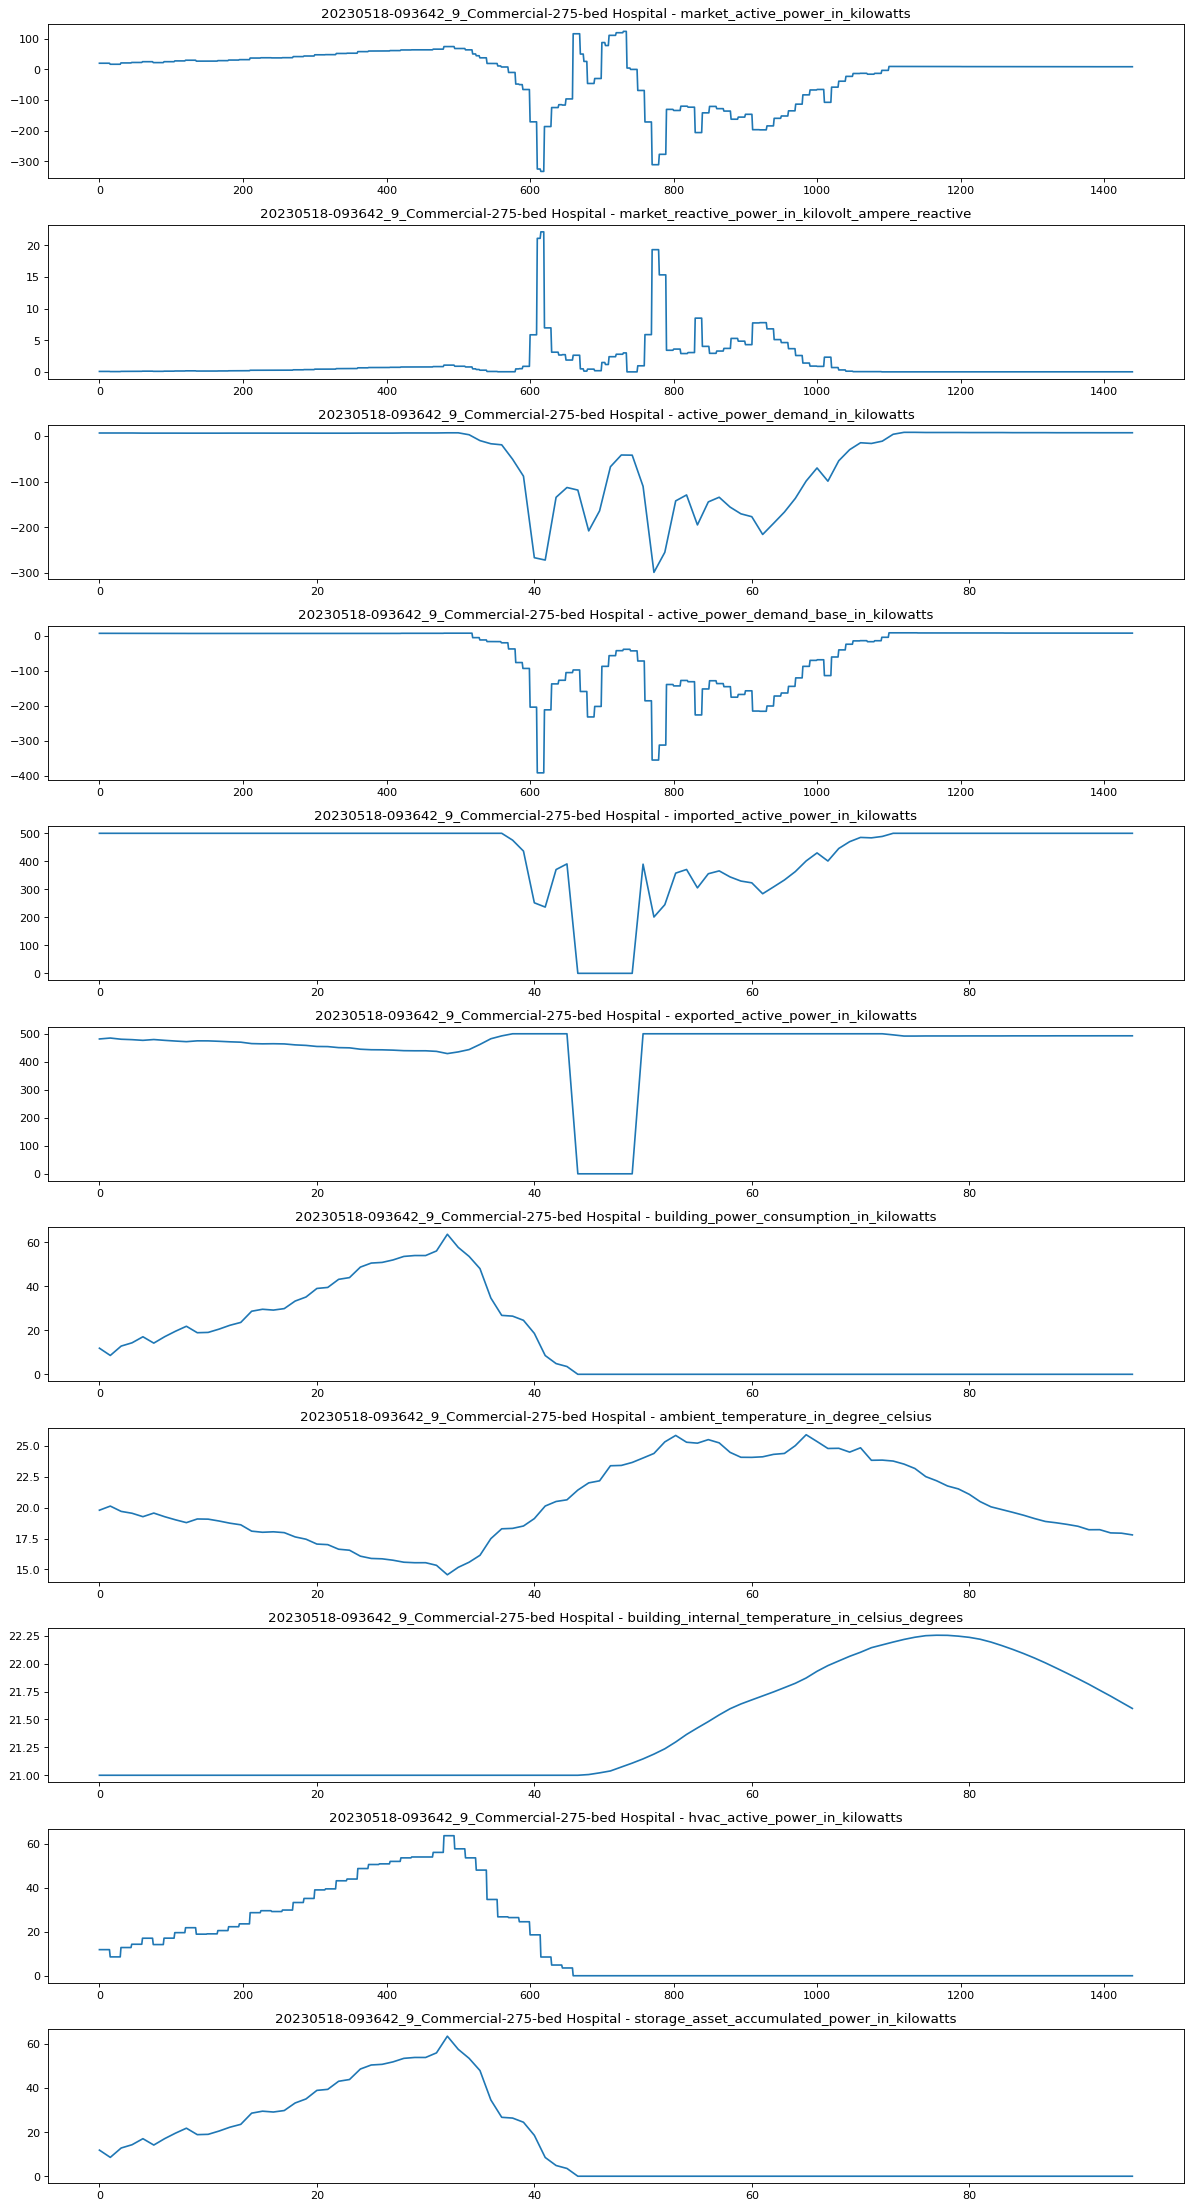

In [42]:
for number_of_row in np.arange(0, number_of_rows):
    row_data = data.iloc[number_of_row]
    row_data = data.iloc[number_of_row]
    figure = plt.figure(num=None, figsize=(15, 30), dpi=80, facecolor='w', edgecolor='k')
    for list_column_index in np.arange(0, len(list_columns)):
        list_column = list_columns[list_column_index]
        plt.subplot(12, 1, list_column_index + 1)
        plt.plot(row_data[list_column])
        case_name = row_data['FolderName']
        plt.title(f'{case_name} - {list_column}')
        figure.tight_layout()
    pp = PdfPages(f'{case_name}.pdf')
    pp.savefig()
    pp.close()